# Introduction <a name="1"></a>


[The Heritage Health Prize (HHP)](https://www.heritagehealthprize.com/c/hhp) was a data science challenge sponsored by [The Heritage Provider Network](http://www.heritageprovidernetwork.com) and posted on Kaggle.  It took place from April 4, 2011 to April 4, 2013.  For information on the winning entries, please see [here](http://www.heritagehealthprize.com/c/hhp/details/milestone-winners).

In this notebook, we follow a traditional data science project process to address the HHP challenge of predicting future hospital stays using past patient treatment information.  

* We extract, transform, and load the data (**ETL**).
* Along the way, we do some exploratory data analysis (**EDA**).
* We conduct **feature engineering**.    
* We then **create models, evaluate their performance, and fine tune their parameters**.  
* We write up our **results**.  

To start you off, we will perform some basic visualization, feature engineering and preprocessing on the data provided.  Then, we build a baseline model using the mean of our training targets to predict our Days in the Hospital for our test set.  Finally, we will build a second model using linear regression over the following features to see if we can improve on our baseline model:

* numerical features
  * `'ClaimsTruncated', 'AgeI', 'min_PayDelay', 'max_PayDelay', 'avg_PayDelay',
       'min_LOS', 'avg_LOS', 'max_LOS', 'avg_dsfs', 
       'min_DrugCount', 'months_DrugCount',
       'max_DrugCount', 'avg_LabCount', 'max_LabCount', 'months_LabCount',
       'min_LabCount'`
* Categorical features
  * `Sex of patient`
* Target variable: Number of days a patient will spend in hosptial over the following year


## Introductory Phase:


### Major updates in the introductory phase.
* Downloaded the data
* ETL the data to generate training and test sets
* Some basic feature engineering
* Built a pipeline for feature engineering and for modeling
* Built a baseline model using linear regression
* Started planning for phase 2

### Major plans for Phase 1
* Plan to engineering features
* Finetune hyperparameters for various machine learning pipelines
* Find and complete the "TASKS" throughout the notebook; use these as starting points for your own experimentation

### Open problems
 * None to report




## Phase-1 Updates:

### Major updates in Phase 1 

* Feature Engineering

  * Category features engineering in df_claims
  * Feature importance

* Tasks
   * Log distribution transform
*  Pipeline
    * Feature selection: feature importance
    * Different algorithms for regression:
    * Fine tune parameters
    *  Cross-validation
    *  GridsearchCV

### Major plans for the next Phase 
* Best model: find better algorithms and finetune parameters. The current RMSE is still very high
* Further feature engineering: category features engineering, NaN data processing
* Feature selection:other feature selection like kernel pca or LDA


### Open problems
 * None to report




## Phase-2 Updates:

### Major updates in Phase 2 
* Feature Engineering
    * Category features engineering in df_claims
* Tasks

    * PCA
* Pipeline

    * Feature selection: Recursive feature elimination
    * Different algorithms for regression:
    * Fine tune parameters
    * Cross-validation


### Major plans for the next Phase 
* More parameter tuning on XGB and GBR
* Feature selection: selectKBest
* Final model evaluation with hold out test data
* Video Presentation


### Open problems
 * None to report
 



## Final Project Submission:

### Major past updates for the final phase 
* Feature Engineering
    * Category features engineering in df_claims
* Feature Selection
    * Feature Importance
    * PCA
    * Recursive feature selection
    * SelectKBest
* Algorithms Racing
    * LinearRegression
    * SGDRegressor
    * RandomForestRegressor
    * LinearDiscriminantAnalysis
    * GradientBoostingRegressor
    * MLPRegressor
    * DecisionTreeRegressor
    * XGBRegressor
* Hyperparameter tuning for best models combined with feature selection
    * SGD with feature importance-feature selection
    * LinearRegression with feature importance-feature selection
    * RandomForest with feature importance-feature selection
    * GBR with feature importance-feature selection
    
    * XGB with PCA(recursively find out the best n_components)
    * GBR with PCA(recursively find out the best n_components)

    * XGB with SelectKBest
    * GBR with SelectKBest
* Sigificant test
    * Significant test with base models
    * Significant test for best 2 models(XGB with PCA and GBR with PCA)
    * Find out the best model(XGB with PCA)
* Best Model Evaluation with hold out test data
    * Best Model score(RMSE) is 0.4557 for XGB with PCA
    * Holdout test data score(RMSE) is 0.4566
    

### Plans for future improvement 
* More feature engineering for other features in df_claims and other tables
* Introduce more algorithms to compare model performance
* Further hyperparameter tunning

### Open problems
 * None to report

# ETL Phase: Load and Preprocess Data

**A copy of the HHP dataset can be downloaded [here](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AADp4D50rGM61hpaSThZnqF3a/HHP_release3?dl=0).  It consists of the following files: ** 
1.  [Claims.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AADAkd0WulfgFthMibmIBtJoa/HHP_release3/Claims.csv?dl=0)  (Claims Data - features)
2.  [DaysInHospital_Y2.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AAD0_gwrKFo657caVjV3mjZVa/HHP_release3/DaysInHospital_Y2.csv?dl=0)  (Target Data for Year 2 - labels)
3.  [DaysInHospital_Y3.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AACmJkf7txiQiPZ_jd5cqsf3a/HHP_release3/DaysInHospital_Y3.csv?dl=0)  (Target Data for Year 3 - labels)
4.  [DrugCount.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AAA_9IxBOsoBSqyhlu7x8z2qa/HHP_release3/DrugCount.csv?dl=0)  (Drug Count Data - features)
5.  [LabCount.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AABxVuWLtBLqdYr6pyJCPsfga/HHP_release3/LabCount.csv?dl=0)  (Lab Count Data - features)
6.  [Members.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AACgVHEh2yUxzavQlurF8hfla/HHP_release3/Members.csv?dl=0)  (Members Data -features)
7.  [Target.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AAD7M6yWTsRtToS7uKmbWrA7a/HHP_release3/Target.csv?dl=0)  (Target Data for Year 4 - labels)



The full dataset is comprised of 5 tables as follows:


1. Members Table, which will include:
    1. MemberID (a unique member ID)
    2. AgeAtFirstClaim (member's age when first claim was made in the Data Set period)
    3. Sex


2. Claims Table, which will include:
    1. MemberID
    2. ProviderID (the ID of the doctor or specialist providing the service)
    3. Vendor (the company that issues the bill)
    4. PCP (member's primary care physician)
    5. Year (the year of the claim, Y1, Y2, Y3)
    6. Specialty
    7. PlaceSvc (place where the member was treated)
    8. PayDelay (the delay between the claim and the day the claim was paid for)
    9. LengthOfStay
    10. DSFS (days since first service that year)
    11. PrimaryConditionGroup (a generalization of the primary diagnosis codes)
    12. CharlsonIndex (a generalization of the diagnosis codes in the form of a categorized comorbidity score)
    13. ProcedureGroup (a generalization of the CPT code or treatment code)
    14. SupLOS (a flag that indicates if LengthOfStay is null because it has been suppressed)


3. Labs Table, which will contain certain details of lab tests provided to members.


4. RX Table, which will contain certain details of prescriptions filled by members.


5. DaysInHospital Tables - Y2, Y3 and Y4, which will contain the number of days of hospitalization for each eligible member during Y2 and Y3 and will include:
    1. MemberID;
    2. ClaimsTruncated (a flag for members who had claims suppressed in the previous year. If the flag is 1 for member xxx in DaysInHospital_Y2, some claims for member xxx will have been suppressed in Y1).
    3. DaysInHospital (the number of days in hospital Y2 or Y3, as applicable).
    
**Note:** Because this was a Kaggle competition, we do not have "DaysInHospital" data for Y4.  This was the target to be predicted for the Kaggle competition.  Therefore, we will be building a model that predicts the number of days in the hospital for Y2 and Y3, since we have those outcomes available to test our model.  We will not use Y4.

The data dictionary is available in PDF format in the DropBox folder.

The tables can be visualized as follows:

<img src="https://dl.dropbox.com/s/d5u2et0xahnt2ct/HHP_DataDictionary.png" width="500" height="500" />


## Prepare the notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

from collections import Counter
from scipy import sparse, stats
from sklearn import preprocessing as prep
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge, SGDClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit, StratifiedKFold
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import Imputer, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.svm import SVC, SVR
from sklearn.utils import check_array
#from sklearn_pandas import CategoricalImputer
from time import time

%matplotlib inline

In [2]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [3]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [4]:
def ttest(control, treatment):
    #paired t-test; two-tailed p-value      A   ,    B
    (t_score, p_value) = stats.ttest_rel(control, treatment)

    if p_value > 0.05/2:  #Two sided 
        print('There is no significant difference between the two machine learning pipelines (Accept H0)')
    else:
        print('The two machine learning pipelines are different (reject H0) \n(t_score, p_value) = (%.2f, %.5f)'%(t_score, p_value) )
        if t_score > 0.0: #in the case of regression lower RMSE is better; A is lower 
            print('Machine learning pipeline A is better than B')
        else:
            print('Machine learning pipeline B is better than A')
    return p_value

## Load and visualize data from each data table

In [5]:
DATA_DIR = os.path.join("C:\\Users\\hjiang\\Desktop\\SU18\\i526\\Project\\HHP\\hhp\\HHP_release3")

In [6]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(df.info())
    display(df.head(2))
    print()
    return df

### First Table: Year Data

Remember, DaysInHospital is not available for Y4 since these were blind targets for the Kaggle competition.

In [7]:
from IPython.display import display, HTML
df_target_Y2 = load_data(os.path.join(DATA_DIR, 'DaysInHospital_Y2.csv'), 'target_Y2')
df_target_Y3 = load_data(os.path.join(DATA_DIR, 'DaysInHospital_Y3.csv'), 'target_Y3')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 3 columns):
MemberID           76038 non-null int64
ClaimsTruncated    76038 non-null int64
DaysInHospital     76038 non-null int64
dtypes: int64(3)
memory usage: 1.7 MB
None


,MemberID,ClaimsTruncated,DaysInHospital
0,24027423,0,0
1,98324177,0,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71435 entries, 0 to 71434
Data columns (total 3 columns):
MemberID           71435 non-null int64
ClaimsTruncated    71435 non-null int64
DaysInHospital     71435 non-null int64
dtypes: int64(3)
memory usage: 1.6 MB
None


,MemberID,ClaimsTruncated,DaysInHospital
0,90963501,0,0
1,85160905,0,0


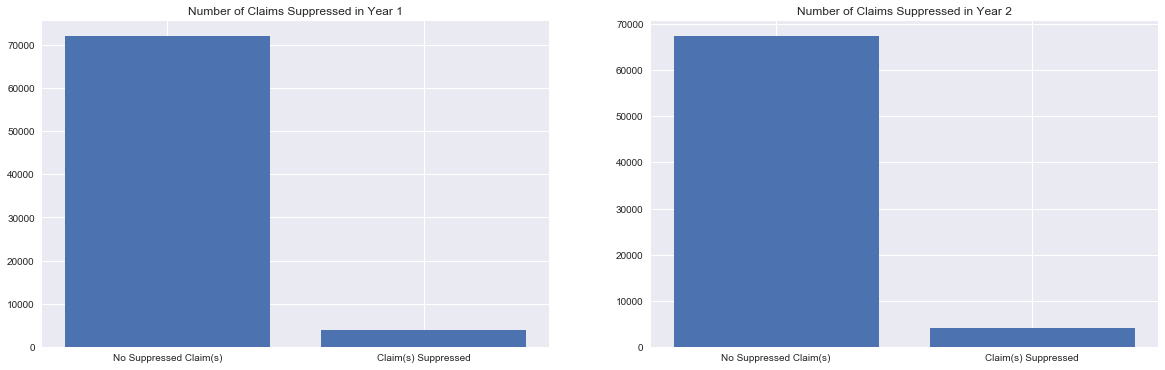

In [8]:


plt.figure(figsize=(20,6))
plt.subplot(1,2,1)     
plt.bar(df_target_Y2['ClaimsTruncated'].unique(),df_target_Y2['ClaimsTruncated'].value_counts(dropna=False))
plt.title('Number of Claims Suppressed in Year 1')
plt.xticks([0,1],['No Suppressed Claim(s)','Claim(s) Suppressed']);

plt.subplot(1,2,2)       
plt.bar(df_target_Y3['ClaimsTruncated'].unique(),df_target_Y3['ClaimsTruncated'].value_counts(dropna=False))
plt.title('Number of Claims Suppressed in Year 2')
plt.xticks([0,1],['No Suppressed Claim(s)','Claim(s) Suppressed']);


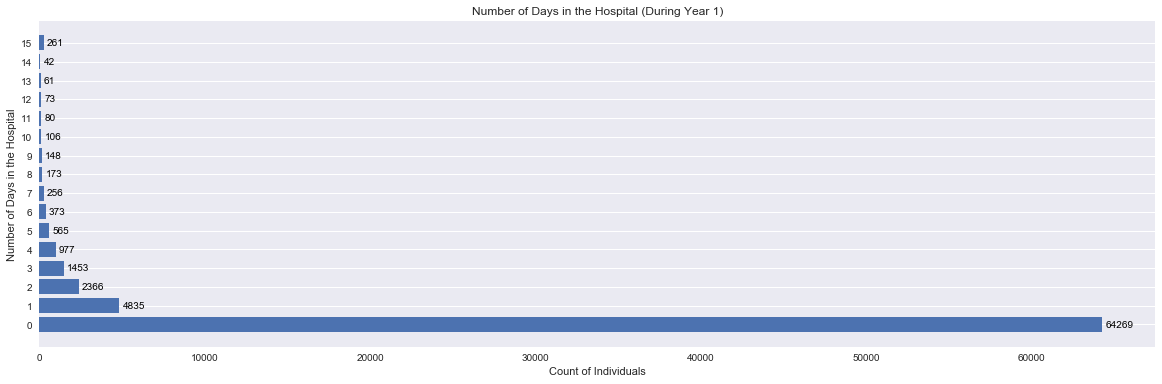

In [9]:
days = df_target_Y2['DaysInHospital'].unique()
days.sort()
inds = df_target_Y2['DaysInHospital'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(20,6))
plt.barh(days,inds)
plt.grid(b=None, which='major', axis='x')
for d in days:
    plt.text(inds[d]+200, d, str(inds[d]), color='black', va='center')
plt.yticks(range(0,16),range(0,16))
plt.ylabel('Number of Days in the Hospital')
plt.xlabel('Count of Individuals')
plt.title('Number of Days in the Hospital (During Year 1)');

#### TASK:  The 0 value records distort the scale.  Present the visualization in log scale.

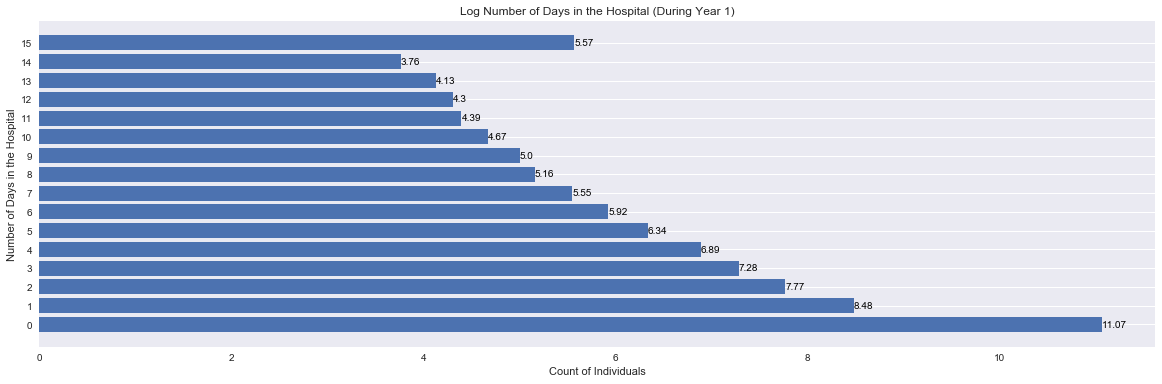

In [10]:
days = df_target_Y2['DaysInHospital'].unique()
days.sort()
inds = df_target_Y2['DaysInHospital'].value_counts(dropna=False).sort_index()
#using log distribution for daysinhospital
inds_log=np.log(inds+1)
plt.figure(figsize=(20,6))
plt.barh(days,inds_log)
plt.grid(b=None, which='major', axis='x')
for d in days:
    plt.text(inds_log[d], d, str(round(inds_log[d],2)), color='black', va='center')
plt.yticks(range(0,16),range(0,16))
plt.ylabel('Number of Days in the Hospital')
plt.xlabel('Count of Individuals')
plt.title('Log Number of Days in the Hospital (During Year 1)');

#### TASK: Visualize a cumulative distribution. 

** Using cumulative defition to show CDF**

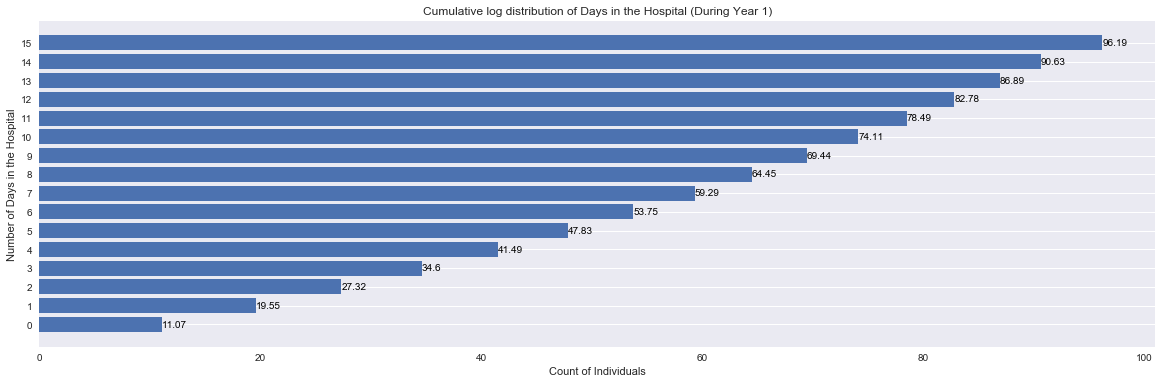

In [11]:
days = df_target_Y2['DaysInHospital'].unique()
days.sort()
inds =df_target_Y2['DaysInHospital'].value_counts(dropna=False).sort_index()
inds_log=np.log(inds)
inds_cum=inds_log
for i in range(len(inds_log)-1):
    inds_cum[i+1]=inds_cum[i]+inds_log[i+1]
plt.figure(figsize=(20,6))
plt.barh(days,inds_cum)
plt.grid(b=None, which='major', axis='x')
for d in days:
    plt.text(inds_cum[d], d, str(round(inds_cum[d],2)), color='black', va='center')
plt.yticks(range(0,16),range(0,16))
plt.ylabel('Number of Days in the Hospital')
plt.xlabel('Count of Individuals')
plt.title('Cumulative log distribution of Days in the Hospital (During Year 1)');

** Using cumulative function to show CDF**

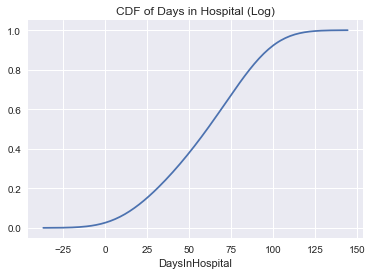

In [12]:
plt.figure(figsize=(6,4))
plt.title('CDF of Days in Hospital (Log)')
sns.distplot(inds_log, hist=False, kde_kws={'cumulative': True});

#### Adding feature to reflect the year of service associated with ClaimsTruncated feature
Remember, DaysInHospital is our target. We will be dropping this. Year of service for ClaimsTruncated is the year prior to the target data, which we will reflect in our Year feature. This feature will allow us to retain knowledge of the source table (Y2, Y3, etc.) after we merge these together.

In [13]:
# Calculate a log target for days in the hospital

df_target_Y2['label'] = np.log(df_target_Y2['DaysInHospital'] + 1)
df_target_Y3['label'] = np.log(df_target_Y3['DaysInHospital'] + 1)

# Add column for year of the associated claims 
df_target_Y2['Year'] = 'Y1'
df_target_Y3['Year'] = 'Y2'



In [14]:
df_target_Y2.head()

,MemberID,ClaimsTruncated,DaysInHospital,label,Year
0,24027423,0,0,0.000000,Y1
1,98324177,0,0,0.000000,Y1
2,33899367,1,1,0.693147,Y1
3,5481382,0,1,0.693147,Y1
4,69908334,0,0,0.000000,Y1


### Second Table: Claims Data

In [15]:
df_claims = load_data(os.path.join(DATA_DIR, 'Claims.csv'), 'claims')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668990 entries, 0 to 2668989
Data columns (total 14 columns):
MemberID                 int64
ProviderID               float64
Vendor                   float64
PCP                      float64
Year                     object
Specialty                object
PlaceSvc                 object
PayDelay                 object
LengthOfStay             object
DSFS                     object
PrimaryConditionGroup    object
CharlsonIndex            object
ProcedureGroup           object
SupLOS                   int64
dtypes: float64(3), int64(2), object(9)
memory usage: 285.1+ MB
None


,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,Y3,Internal,Office,50,NaN,7- 8 months,NEUMENT,1-2,EM,0


In [16]:
# payment delay values are all integers except 162+ (where value is capped)
df_claims['PayDelay'].value_counts()[:10]

0       141451
162+     92592
28       87286
23       85165
29       83899
22       83380
24       82660
30       78784
21       78751
31       73889
Name: PayDelay, dtype: int64

#### Convert 162+ to numeric value so we can treat this feature as numeric (integer) instead of categorical

In [17]:
df_claims['PayDelay'] = np.where(df_claims['PayDelay']=='162+', 162, df_claims['PayDelay'])
df_claims['PayDelay'] = df_claims['PayDelay'].astype(int)

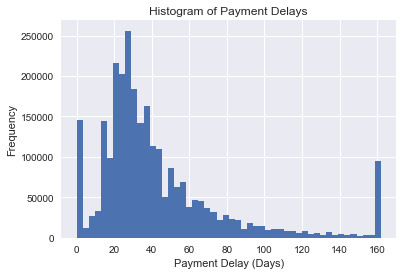

In [18]:
plt.hist(df_claims['PayDelay'].values, bins=50)
plt.title('Histogram of Payment Delays')
plt.xlabel('Payment Delay (Days)')
plt.ylabel('Frequency');

#### We can join claims and DaysInHospital tables to visualize how each facet of these features relates to our target

In [19]:
# inner join of df_claims and df_target_Y2
merged = pd.merge(left=df_claims, right=df_target_Y2, left_on='MemberID', right_on='MemberID')

In [20]:
merged.columns

Index(['MemberID', 'ProviderID', 'Vendor', 'PCP', 'Year_x', 'Specialty',
       'PlaceSvc', 'PayDelay', 'LengthOfStay', 'DSFS', 'PrimaryConditionGroup',
       'CharlsonIndex', 'ProcedureGroup', 'SupLOS', 'ClaimsTruncated',
       'DaysInHospital', 'label', 'Year_y'],
      dtype='object')

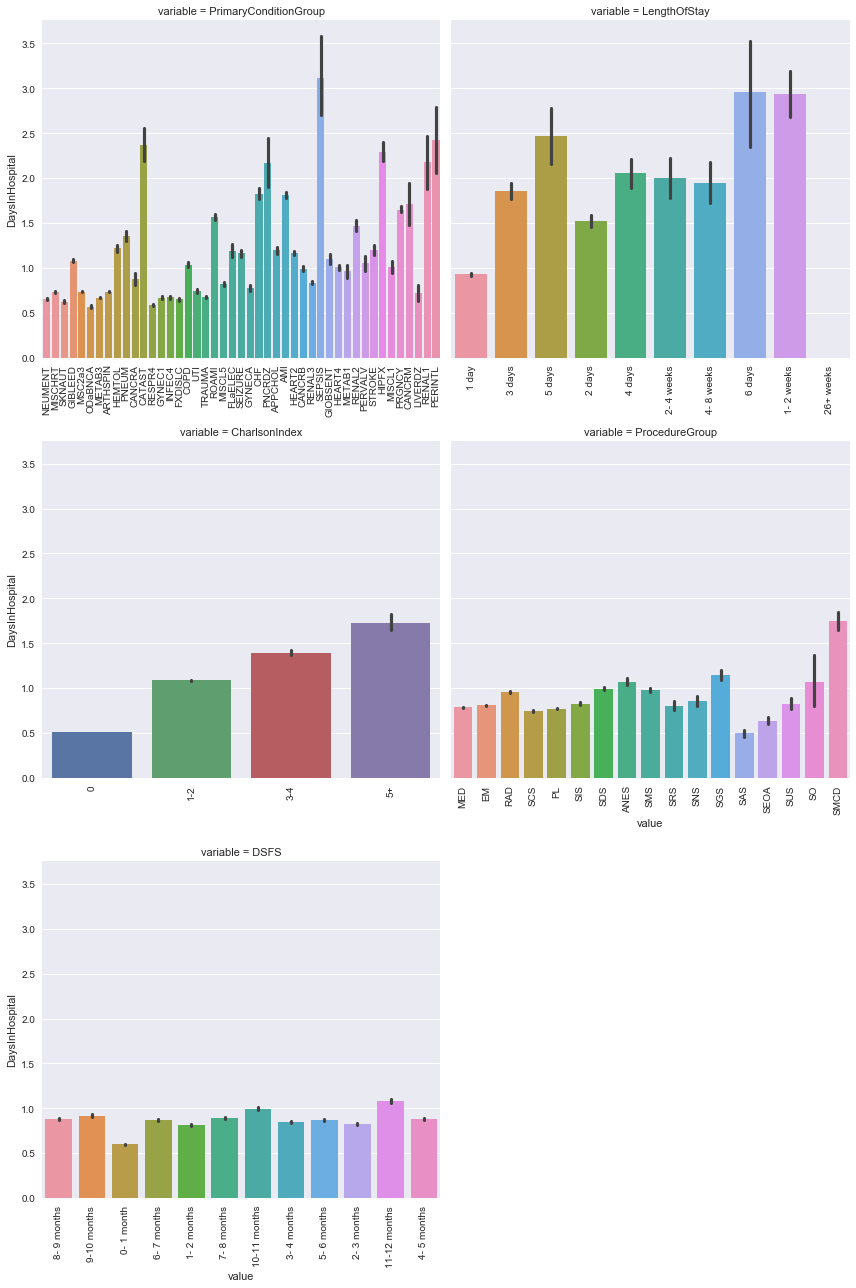

<Figure size 432x216 with 0 Axes>

<Figure size 432x216 with 0 Axes>

<Figure size 432x216 with 0 Axes>

<Figure size 432x216 with 0 Axes>

<Figure size 432x216 with 0 Axes>

In [21]:
# evaluate how facets of each feature relate to number of days in hospital
def plot(x,y,**kwargs):
    sns.barplot(x,y)
    plt.xticks(rotation='vertical')
    plt.figure(figsize = (6,3))

cat_vars = ['PrimaryConditionGroup','LengthOfStay','CharlsonIndex','ProcedureGroup', 'DSFS']
df = pd.melt(merged,id_vars='DaysInHospital', value_vars=cat_vars)
grid = sns.FacetGrid(df, col='variable', col_wrap=2, sharex=False, sharey=True, size = 6)
grid = grid.map(plot, 'value', 'DaysInHospital');

#### TASK: Are there similar insights you can identify by exploring the value_counts of other claims features?

In [22]:
# payment delay values are all integers except 162+ (where value is capped)
df_claims['DSFS'].value_counts()[:10]

0- 1 month     707721
1- 2 months    247343
2- 3 months    225216
3- 4 months    212214
5- 6 months    192000
4- 5 months    189001
6- 7 months    180662
7- 8 months    175191
8- 9 months    171878
9-10 months    151527
Name: DSFS, dtype: int64

In [23]:
# payment delay values are all integers except 162+ (where value is capped)
df_claims['LengthOfStay'].value_counts()[:10]

1 day         56696
2 days         6485
3 days         3246
4 days         1473
1- 2 weeks     1143
2- 4 weeks      961
4- 8 weeks      903
5 days          510
6 days          179
26+ weeks         2
Name: LengthOfStay, dtype: int64

In [24]:
# payment delay values are all integers except 162+ (where value is capped)
df_claims['CharlsonIndex'].value_counts()[:10]

0      1356995
1-2    1256527
3-4      49479
5+        5989
Name: CharlsonIndex, dtype: int64

** Other similiar insights by value_count**

In [25]:
df_claims['PlaceSvc'].value_counts()[:10]

Office                 1542007
Independent Lab         657750
Urgent Care             199528
Outpatient Hospital     121528
Inpatient Hospital       85776
Ambulance                34766
Other                    11700
Home                      8303
Name: PlaceSvc, dtype: int64

In [26]:
df_claims['PrimaryConditionGroup'].value_counts()[:10]

MSC2a3      507277
METAB3      320553
ARTHSPIN    288285
NEUMENT     171605
RESPR4      138062
MISCHRT     131047
SKNAUT      107976
GIBLEED     101846
INFEC4       83552
TRAUMA       72050
Name: PrimaryConditionGroup, dtype: int64

In [27]:
df_claims['ProcedureGroup'].value_counts()[:10]

EM      1048210
PL       492919
MED      372101
SCS      274805
RAD      265272
SDS       60678
SIS       56461
SMS       29177
ANES      17061
SGS        9406
Name: ProcedureGroup, dtype: int64

In [28]:
df_claims['SupLOS'].value_counts()[:10]

0    2657658
1      11332
Name: SupLOS, dtype: int64

In [29]:
df_claims['Specialty'].value_counts()[:10]

Internal                     672059
Laboratory                   653188
General Practice             473655
Surgery                      208217
Diagnostic Imaging           207297
Emergency                    126130
Other                         92687
Pediatrics                    84862
Rehabilitation                57554
Obstetrics and Gynecology     36594
Name: Specialty, dtype: int64

In [30]:
df_claims['Year'].value_counts()[:10]

Y3    904429
Y2    898872
Y1    865689
Name: Year, dtype: int64

In [31]:
df_claims['PayDelay'].value_counts()[:10]

0      141451
162     92592
28      87286
23      85165
29      83899
22      83380
24      82660
30      78784
21      78751
31      73889
Name: PayDelay, dtype: int64

** more insights about patients claim**

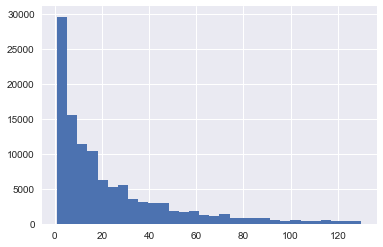

In [32]:
plt.hist(df_claims['MemberID'].value_counts(), bins = 30);

In [33]:
## diferentiate with low, middle, and high
memb_all = df_claims['MemberID'].nunique()
memb_5plus = df_claims['MemberID'].value_counts()>=5
memb_40plus = df_claims['MemberID'].value_counts()>=40
mem_low=memb_all-sum(memb_5plus)
mem_mid=sum(memb_5plus)-sum(memb_40plus)
mem_hig=sum(memb_40plus)

print('Percentage with low claims:', np.round((mem_low/memb_all),2))
print('Percentage with middle claims:', np.round((mem_mid/memb_all),2))
print('Percentage with high claims:', np.round((mem_hig/memb_all),2))

Percentage with low claims: 0.22
Percentage with middle claims: 0.58
Percentage with high claims: 0.2


#### Build transformation functions to perform feature engineering on claims data

Examples might include converting ordinal categories to numerical approximations or aggregating existing features to create additional features. Following is an example to perform these transformations in a pipeline.

In [34]:
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else 162)
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X

In [35]:
# Create aggregate features (via pipeline)
class ClaimAggregater(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        agg_op_dt_claim = {
            'PayDelay': {
                'max_PayDelay': 'max',
                'min_PayDelay': 'min',
                'avg_PayDelay': 'mean'
            },
            'LengthOfStay': {
                'max_LOS': 'max',
                'min_LOS': 'min',
                'avg_LOS': 'mean'
            },
            'DSFS': {
                'max_dsfs': 'max',
                'min_dsfs': 'min',
                'avg_dsfs': 'mean'
            },
            'CharlsonIndex': {
                'max_CharlsonIndex': 'max',
                'min_CharlsonIndex': 'min',
                'avg_CharlsonIndex': 'mean'
            }
        }
        result = X.groupby(['Year', 'MemberID']).agg(agg_op_dt_claim)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=['Year', 'MemberID'])
        result['range_dsfs'] = result['max_dsfs'] - result['min_dsfs']
        result['range_CharlsonIndex'] = result['max_CharlsonIndex'] - result['min_CharlsonIndex']
        return result

In [36]:
claim_pipeline = Pipeline([
    ('claim_adder', ClaimAttributesAdder()),
    ('claim_aggregater', ClaimAggregater())
    ])
df_claims_aggregated = claim_pipeline.transform(df_claims)

In [37]:
df_claims_aggregated.head()

,Year,MemberID,max_PayDelay,min_PayDelay,avg_PayDelay,max_LOS,min_LOS,avg_LOS,max_dsfs,min_dsfs,avg_dsfs,max_CharlsonIndex,min_CharlsonIndex,avg_CharlsonIndex,range_dsfs,range_CharlsonIndex
0,Y1,210,162,22,90.000000,2.0,2.0,2.0,10.0,1.0,3.500000,0,0,0.000000,9.0,0
1,Y1,3197,162,36,98.400000,NaN,NaN,NaN,6.0,1.0,2.600000,0,0,0.000000,5.0,0
2,Y1,3889,162,33,70.692308,2.0,1.0,1.5,2.0,1.0,1.076923,2,0,0.615385,1.0,2
3,Y1,4187,162,29,85.000000,NaN,NaN,NaN,9.0,1.0,3.750000,0,0,0.000000,8.0,0
4,Y1,9063,68,39,60.250000,NaN,NaN,NaN,2.0,1.0,1.250000,0,0,0.000000,1.0,0


#### TASK: Are there additional features you can engineer? 
The example provided is only an example. You can do better! Ideally, additional features should add insight that is not already present in the data.

**There are several category features which we can engineer, the following is the function to engineer category features**

In [38]:
def count_categorical(df, group_var, categoryname,df_name):
    """Computes counts and normalized counts for each observation
    of `group_var` of each unique category in every categorical variable
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    group_var : string
        The variable by which to group the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with counts and normalized counts of each unique category in every categorical variable
        with one row for every unique value of the `group_var`.
        
    """
    
    # Select the categorical columns
    #categorical = pd.get_dummies(df.select_dtypes('object'))
    categorical = pd.get_dummies(categoryname)

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    #categorical.columns = categorical.columns.droplevel()
    categorical = categorical.reset_index(level=group_var)
    
    return categorical


In [39]:
# Counts of each type of status
category_name=['PlaceSvc','PrimaryConditionGroup','ProcedureGroup','Specialty','SupLOS']
df_claims_category_counts = count_categorical(df_claims, group_var = (['Year','MemberID']),categoryname=category_name, df_name = 'df_claims')
df_claims_category_counts.head()

,Year,MemberID,df_claims_PlaceSvc_count,df_claims_PlaceSvc_count_norm,df_claims_PrimaryConditionGroup_count,df_claims_PrimaryConditionGroup_count_norm,df_claims_ProcedureGroup_count,df_claims_ProcedureGroup_count_norm,df_claims_Specialty_count,df_claims_Specialty_count_norm,df_claims_SupLOS_count,df_claims_SupLOS_count_norm
0,Y1,42286978,1,1,0,0,0,0,0,0,0,0
1,Y2,11837054,0,0,0,0,0,0,0,0,1,1
2,Y3,2759427,0,0,0,0,1,1,0,0,0,0
3,Y3,73570559,0,0,0,0,0,0,1,1,0,0
4,Y3,97903248,0,0,1,1,0,0,0,0,0,0


In [40]:
df_claims_category_counts.shape

(5, 12)

** Simplify "LengthofStay" features to 0,1,2**

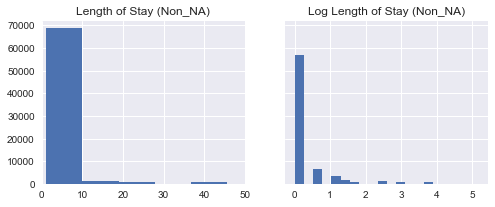

In [41]:
los = np.where(df_claims['LengthOfStay']>0)[0]
df_claims['LengthOfStay'].iloc[los].value_counts(dropna=False)
log_los = np.log(df_claims['LengthOfStay'].iloc[los])
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,3))
ax[0].set_xlim(0,50)
ax[0].hist(df_claims['LengthOfStay'].iloc[los], bins=20)
ax[0].set_title('Length of Stay (Non_NA)')
ax[1].hist(log_los, bins=20)
ax[1].set_title('Log Length of Stay (Non_NA)');

In [42]:
# Categorize length of stay as 0, 1 or 2
#df_claims['LOS'] = np.where(df_claims['LengthOfStay'].isnull(), 0, df_claims['LengthOfStay'])
#df_claims['LOS'] = np.where(df_claims['LengthOfStay'] > 1, 2, df_claims['LengthOfStay'])

### Third Table: Drug Data

In [43]:
df_drug_count = load_data(os.path.join(DATA_DIR, 'DrugCount.csv'), 'drug_count')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818241 entries, 0 to 818240
Data columns (total 4 columns):
MemberID     818241 non-null int64
Year         818241 non-null object
DSFS         818241 non-null object
DrugCount    818241 non-null object
dtypes: int64(1), object(3)
memory usage: 25.0+ MB
None


,MemberID,Year,DSFS,DrugCount
0,48925661,Y2,9-10 months,7+
1,90764620,Y3,8- 9 months,3


#### Perform similar feature transformations for drug data

In [44]:
df_drug_count['DrugCount'].value_counts(dropna=False)

1     263501
2     188559
3     129881
4      87783
5      57768
7+     54018
6      36731
Name: DrugCount, dtype: int64

In [45]:
df_drug_count['DSFS'].value_counts(dropna=False)

0- 1 month      108980
1- 2 months      81395
2- 3 months      78528
3- 4 months      77044
4- 5 months      73325
5- 6 months      72274
6- 7 months      69350
7- 8 months      67433
8- 9 months      62700
9-10 months      55984
10-11 months     46184
11-12 months     25044
Name: DSFS, dtype: int64

In [46]:
# preprocess via pipeline
class DrugAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):  
        dsfs_dt = {'0- 1 month': 15, '1- 2 months': 45, '2- 3 months': 75, '3- 4 months': 105, 
                   '4- 5 months': 135, '5- 6 months': 165, '6- 7 months': 195, '7- 8 months': 225, 
                   '8- 9 months': 255, '9-10 months': 285, '10-11 months': 315, '11-12 months': 345}
        X['DSFS'] = X['DSFS'].apply(lambda x: dsfs_dt[x])
        X['DrugCount'] = X['DrugCount'].apply(lambda x: 7 if x == '7+' else int(x))
        return X

In [47]:
agg_op_dt_drug = {
    'DrugCount': {
        'max_DrugCount': 'max',
        'min_DrugCount': 'min',
        'avg_DrugCount': 'mean',
        'months_DrugCount': 'count'
    }
}

In [48]:
# aggregate by MemberID and year (via pipeline)
class DrugAggregater(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        agg_op_dt_drug = {
            'DrugCount': {
                'max_DrugCount': 'max',
                'min_DrugCount': 'min',
                'avg_DrugCount': 'mean',
                'months_DrugCount': 'count'
            }
        }
        result = X.groupby(['Year', 'MemberID']).agg(agg_op_dt_drug)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=['Year', 'MemberID'])
        return result

In [49]:
df_drug_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818241 entries, 0 to 818240
Data columns (total 4 columns):
MemberID     818241 non-null int64
Year         818241 non-null object
DSFS         818241 non-null object
DrugCount    818241 non-null object
dtypes: int64(1), object(3)
memory usage: 25.0+ MB


In [50]:
drug_pipeline = Pipeline([
    ('drug_adder', DrugAttributesAdder()),
    ('drug_aggregater', DrugAggregater())
    ])
df_drug_count_aggregated = drug_pipeline.transform(df_drug_count)

In [51]:
df_drug_count_aggregated.head()

,Year,MemberID,max_DrugCount,min_DrugCount,avg_DrugCount,months_DrugCount
0,Y1,210,2,1,1.666667,3
1,Y1,3197,2,1,1.250000,4
2,Y1,3889,5,2,3.000000,10
3,Y1,4187,7,3,6.100000,10
4,Y1,9063,1,1,1.000000,2


### Fourth Table: Lab Data

In [52]:
df_lab_count = load_data(os.path.join(DATA_DIR, 'LabCount.csv'), 'lab_count')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361484 entries, 0 to 361483
Data columns (total 4 columns):
MemberID    361484 non-null int64
Year        361484 non-null object
DSFS        361484 non-null object
LabCount    361484 non-null object
dtypes: int64(1), object(3)
memory usage: 11.0+ MB
None


,MemberID,Year,DSFS,LabCount
0,69258001,Y3,2- 3 months,1
1,10143167,Y1,0- 1 month,2


In [53]:
df_lab_count['LabCount'].value_counts(dropna=False)

1      93744
2      54183
3      43472
4      38815
5      34900
6      27705
10+    23110
7      20591
8      14885
9      10079
Name: LabCount, dtype: int64

In [54]:
df_lab_count['DSFS'].value_counts(dropna=False)

0- 1 month      97581
1- 2 months     32279
2- 3 months     30305
3- 4 months     29750
5- 6 months     27460
4- 5 months     26432
6- 7 months     26103
7- 8 months     24724
8- 9 months     23455
9-10 months     20126
10-11 months    16054
11-12 months     7215
Name: DSFS, dtype: int64

In [55]:
# preprocess via pipeline
class LabAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        dsfs_dt = {'0- 1 month': 15, '1- 2 months': 45, '2- 3 months': 75, '3- 4 months': 105, 
           '4- 5 months': 135, '5- 6 months': 165, '6- 7 months': 195, '7- 8 months': 225, 
           '8- 9 months': 255, '9-10 months': 285, '10-11 months': 315, '11-12 months': 345}
        X['DSFS'] = X['DSFS'].apply(lambda x: dsfs_dt[x])
        X['LabCountI'] = X['LabCount'].apply(lambda x: 10 if x == '10+' else int(x))
        return X

In [56]:
# Aggregate via pipeline
class LabAggregater(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        agg_op_dt_lab = {
            'LabCountI': {
                'max_LabCount': 'max',
                'min_LabCount': 'min',
                'avg_LabCount': 'mean',
                'months_LabCount': 'count'
            }
        }
        result = X.groupby(['Year', 'MemberID']).agg(agg_op_dt_lab)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=['Year', 'MemberID'])
        return result

In [57]:
lab_pipeline = Pipeline([
    ('lab_adder', LabAttributesAdder()),
    ('lab_aggregater', LabAggregater())
    ])
df_lab_count_aggregated = lab_pipeline.transform(df_lab_count)

In [58]:
df_lab_count_aggregated.head()

,Year,MemberID,max_LabCount,min_LabCount,avg_LabCount,months_LabCount
0,Y1,210,2,2,2.0,1
1,Y1,3889,10,10,10.0,1
2,Y1,11951,3,3,3.0,1
3,Y1,14661,2,2,2.0,1
4,Y1,14778,2,2,2.0,1


### Fifth Table: Members Data

In [59]:
df_members = load_data(os.path.join(DATA_DIR, 'Members.csv'), 'members')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113000 entries, 0 to 112999
Data columns (total 3 columns):
MemberID           113000 non-null int64
AgeAtFirstClaim    107247 non-null object
Sex                95448 non-null object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB
None


,MemberID,AgeAtFirstClaim,Sex
0,14723353,70-79,M
1,75706636,70-79,M


In [60]:
df_members['AgeAtFirstClaim'].value_counts(dropna=False)

40-49    16111
70-79    14514
50-59    13329
60-69    12622
30-39    12435
10-19    11319
0-9      10791
20-29     8505
80+       7621
NaN       5753
Name: AgeAtFirstClaim, dtype: int64

In [61]:

df_members.groupby(["AgeAtFirstClaim", "Sex"]).size()

AgeAtFirstClaim  Sex
0-9              F      4761
                 M      4901
10-19            F      5137
                 M      5063
20-29            F      4347
                 M      3118
30-39            F      6026
                 M      5063
40-49            F      7510
                 M      6780
50-59            F      5976
                 M      5532
60-69            F      5881
                 M      4736
70-79            F      6786
                 M      5281
80+              F      3622
                 M      2151
dtype: int64

In [62]:
# separate AgeAtFirstClaim and Sex features for separate pre-processing
df_members_age = df_members.drop('Sex',axis=1)
df_members_sex = pd.DataFrame(df_members['Sex'],columns=['Sex'])

In [63]:
# convert 'AgeAtFirstClaim' to numerical approximation
class MemberAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        age_dt = {'40-49': 45, '70-79': 75, '50-59': 55, '60-69': 65, '30-39': 35,
          '10-19': 15, '0-9': 5, '20-29': 25, '80+': 85}
        X['AgeAtFirstClaim'] = X['AgeAtFirstClaim'].apply(lambda x: None if pd.isnull(x) else age_dt[x])
        return X
    
adder = MemberAttributesAdder()
df_members = adder.fit_transform(df_members_age)

#### There are a lot of NaN values in the 'Sex' feature. One approach is to handle this through the One Hot Encoding process.

In [64]:
df_members_sex['Sex'].value_counts(dropna=False)

F      51482
M      43966
NaN    17552
Name: Sex, dtype: int64

In [65]:
# convert 'Sex' feature to numerical and OHE to account for NaN values (i.e., F=0, M=0)
class MemberLabelEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X['Sex'] = np.where(X['Sex'].isnull(),'NaN',X['Sex'])
        self.le = LabelEncoder()
        self.le.fit(X['Sex'])
        self.classes = self.le.classes_
        return self
    def transform(self, X, y=None): 
        X['Sex'] = np.where(X['Sex'].isnull(),'NaN',X['Sex'])
        X['Sex'] = self.le.transform(X['Sex'])
        return X

class DropOneColumn(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        #classes = member_cat_pipeline.named_steps.encoder.classes
        classes = ['F', 'M', 'NaN']
        
        X = pd.DataFrame(X[:,:2], columns=classes[:2])
        return X
    
member_cat_pipeline = Pipeline([('encoder', MemberLabelEncoder()),
                                ('ohe', OneHotEncoder(sparse=False)),
                                ('dropcol', DropOneColumn())
                               ])
df_members_sex = member_cat_pipeline.fit_transform(df_members_sex)

In [66]:
# rejoin Age and Sex columns
df_members[['F','M']] = df_members_sex

In [67]:
df_members.head()

,MemberID,AgeAtFirstClaim,F,M
0,14723353,75.0,0.0,1.0
1,75706636,75.0,0.0,1.0
2,17320609,75.0,0.0,1.0
3,69690888,45.0,0.0,1.0
4,33004608,5.0,0.0,1.0


## Merge Data
We have been processing each table separately to this point. Now we will combine all of our data into one dataset (df_merged). 

In [68]:
# 1. Union Target DataFrames Across Years
df_merged = pd.concat([df_target_Y2, df_target_Y3])

# 2. Join/Merge in Members Data
df_merged = df_merged.merge(df_members, how='left', on='MemberID')

# 3. Join/Merge in Aggregated Claims Data
df_merged = df_merged.merge(df_claims_aggregated, how='left', on=['MemberID', 'Year'])

# 4. Join/Merge in Aggregated Drug Data
df_merged = df_merged.merge(df_drug_count_aggregated, how='left', on=['MemberID', 'Year'])

# 5. Join/Merge in Aggregated Lab Data
df_merged = df_merged.merge(df_lab_count_aggregated, how='left', on=['MemberID', 'Year'])


** Merge SupLOS to merged dataframe**

In [69]:
df_merged_01=df_merged.merge(df_claims.loc[:,['MemberID','Year','SupLOS']],how='left', on=['MemberID', 'Year'])

** Another merged data with category featuring data in above session**

In [70]:
# 6. Join/Merge in df_claims_category_counts
#There are additional 10 features
df_merged_new = df_merged_01.merge(df_claims_category_counts, how='left', on=['MemberID', 'Year'])
df_merged_new.shape

(1764561, 41)

In [71]:
# drop columns we will not be using for analysis
df_final = df_merged.drop(['MemberID', 'DaysInHospital', 'Year'], axis=1)
df_final.shape

(147473, 27)

In [72]:
# drop columns we will not be using for analysis
df_final_01 = df_merged_01.drop(['MemberID', 'DaysInHospital', 'Year'], axis=1)
df_final_01.shape

(1764561, 28)

In [73]:
# drop columns we will not be using for analysis
df_final_new = df_merged_new.drop(['MemberID', 'DaysInHospital', 'Year'], axis=1)
df_final_new.shape

(1764561, 38)

In [74]:
#  'label' is our log-transformed target. we will need to separate this out before we build our model.
df_final_01.head()

,ClaimsTruncated,label,AgeAtFirstClaim,F,M,max_PayDelay,min_PayDelay,avg_PayDelay,max_LOS,min_LOS,...,range_CharlsonIndex,max_DrugCount,min_DrugCount,avg_DrugCount,months_DrugCount,max_LabCount,min_LabCount,avg_LabCount,months_LabCount,SupLOS
0,0,0.0,35.0,0.0,1.0,35,27,30.4,NaN,NaN,...,4,3.0,3.0,3.0,1.0,7.0,7.0,7.0,1.0,0
1,0,0.0,35.0,0.0,1.0,35,27,30.4,NaN,NaN,...,4,3.0,3.0,3.0,1.0,7.0,7.0,7.0,1.0,0
2,0,0.0,35.0,0.0,1.0,35,27,30.4,NaN,NaN,...,4,3.0,3.0,3.0,1.0,7.0,7.0,7.0,1.0,0
3,0,0.0,35.0,0.0,1.0,35,27,30.4,NaN,NaN,...,4,3.0,3.0,3.0,1.0,7.0,7.0,7.0,1.0,0
4,0,0.0,35.0,0.0,1.0,35,27,30.4,NaN,NaN,...,4,3.0,3.0,3.0,1.0,7.0,7.0,7.0,1.0,0


# EDA

In [75]:
corr_matrix = df_final.corr()
corr_matrix["label"].sort_values(ascending=False)

label                  1.000000
max_DrugCount          0.173162
ClaimsTruncated        0.167734
max_CharlsonIndex      0.161397
avg_DrugCount          0.157510
avg_CharlsonIndex      0.151023
AgeAtFirstClaim        0.146692
months_LabCount        0.135606
months_DrugCount       0.135003
max_dsfs               0.128256
range_dsfs             0.127710
range_CharlsonIndex    0.120726
avg_dsfs               0.118638
max_PayDelay           0.111504
min_CharlsonIndex      0.102417
max_LabCount           0.095338
max_LOS                0.078603
avg_LOS                0.065573
min_DrugCount          0.061915
min_LOS                0.034003
avg_LabCount           0.033287
min_dsfs               0.026244
avg_PayDelay          -0.004391
min_LabCount          -0.025444
F                     -0.046683
min_PayDelay          -0.071457
M                     -0.090794
Name: label, dtype: float64

In [76]:
corr_matrix_01 = df_final_01.corr()
corr_matrix_01["label"].sort_values(ascending=False)

label                  1.000000
ClaimsTruncated        0.179777
max_DrugCount          0.168149
max_CharlsonIndex      0.162070
avg_DrugCount          0.157636
avg_CharlsonIndex      0.153882
AgeAtFirstClaim        0.152620
months_DrugCount       0.126494
max_dsfs               0.116664
range_dsfs             0.115635
months_LabCount        0.111132
range_CharlsonIndex    0.110240
min_CharlsonIndex      0.104606
avg_dsfs               0.104295
max_PayDelay           0.098968
max_LabCount           0.085101
max_LOS                0.083029
min_DrugCount          0.069031
avg_LOS                0.068415
min_LOS                0.033978
min_dsfs               0.030936
avg_LabCount           0.028293
SupLOS                 0.019585
avg_PayDelay          -0.012028
min_LabCount          -0.027731
F                     -0.055256
M                     -0.064079
min_PayDelay          -0.072384
Name: label, dtype: float64

In [77]:
corr_matrix_new = df_final_new.corr()
corr_matrix_new["label"].sort_values(ascending=False)

df_claims_PlaceSvc_count_norm                 1.000000
df_claims_PlaceSvc_count                      1.000000
label                                         1.000000
ClaimsTruncated                               0.179777
max_DrugCount                                 0.168149
max_CharlsonIndex                             0.162070
avg_DrugCount                                 0.157636
avg_CharlsonIndex                             0.153882
AgeAtFirstClaim                               0.152620
months_DrugCount                              0.126494
max_dsfs                                      0.116664
range_dsfs                                    0.115635
months_LabCount                               0.111132
range_CharlsonIndex                           0.110240
min_CharlsonIndex                             0.104606
avg_dsfs                                      0.104295
max_PayDelay                                  0.098968
max_LabCount                                  0.085101
max_LOS   

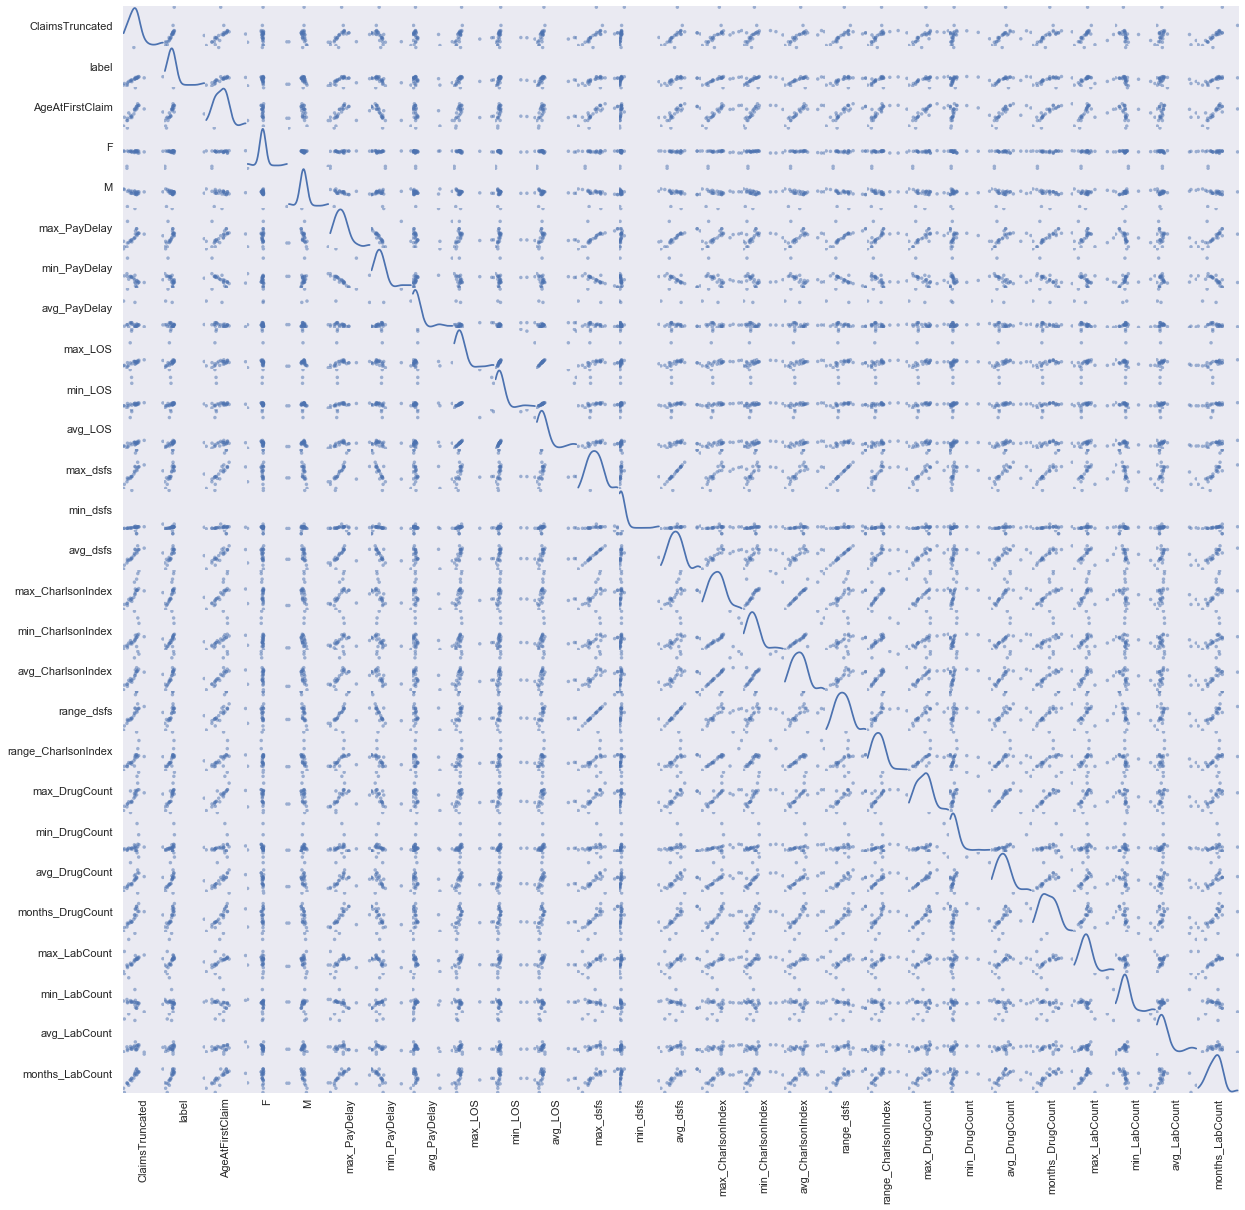

In [78]:
sm = pd.tools.plotting.scatter_matrix(corr_matrix, figsize=(20,20), diagonal='kde')

[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.set_ylabel(s.get_ylabel(), va='center', ha='right', rotation=0, labelpad=10) for s in sm.reshape(-1)]
[s.tick_params(axis='y', which='major', pad=40) for s in sm.reshape(-1)]
[s.set_xticks([]) for s in sm.reshape(-1)]
[s.set_yticks([]) for s in sm.reshape(-1)];

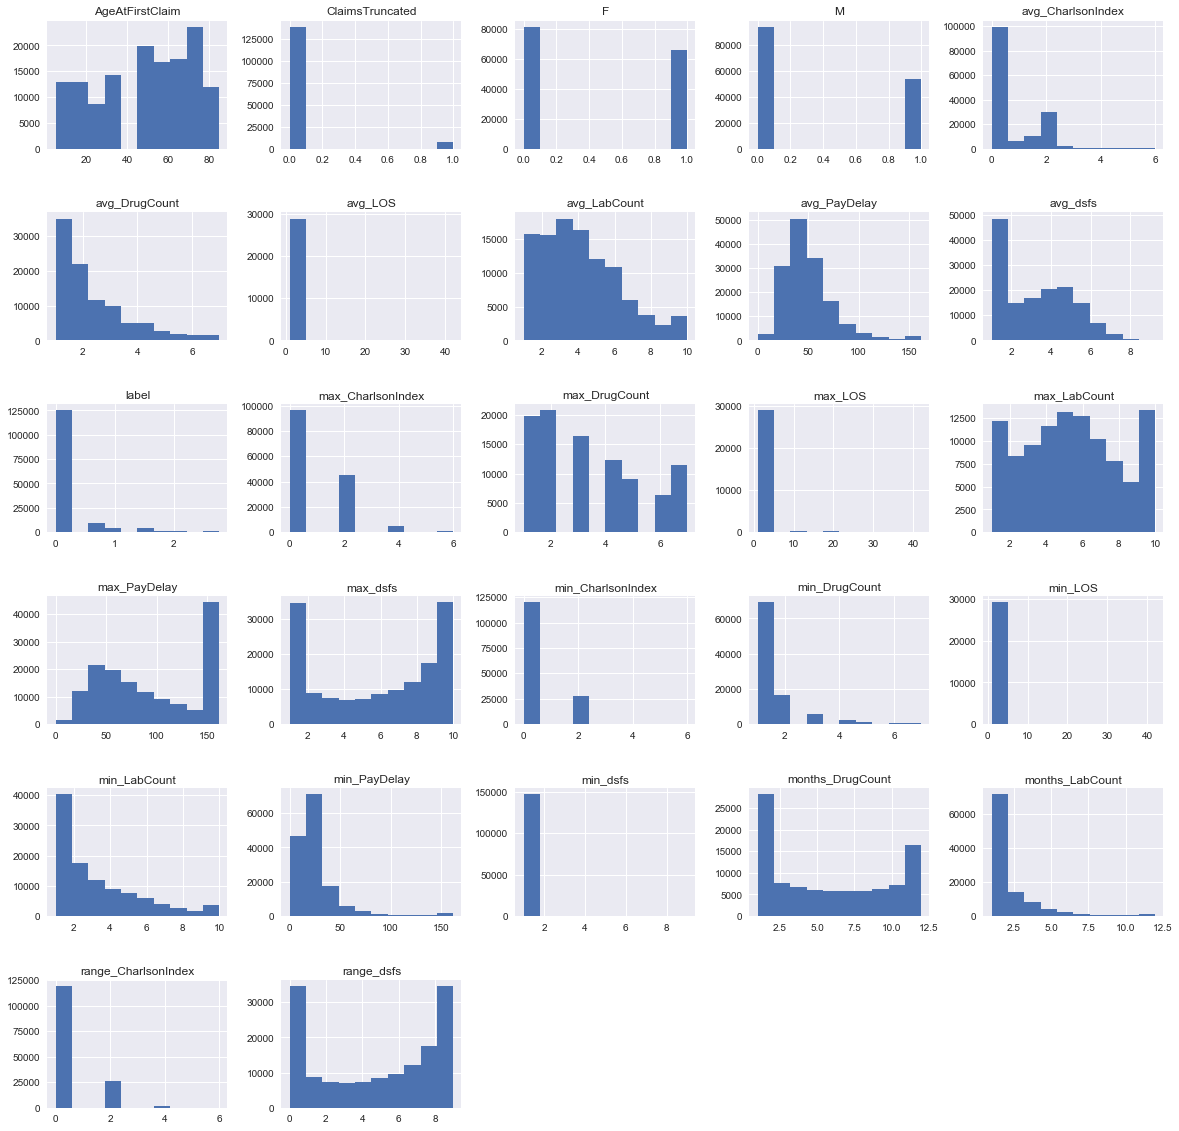

In [79]:
df_final.hist(figsize=(20,20))
plt.subplots_adjust(hspace=.5);

# HHPError  prediction perfromance measure

We will report model performance in terms of the `HHPError` which is defined below.

The [HHP prediction accuracy measure](https://www.heritagehealthprize.com/c/hhp/details/evaluation) is the log root-mean-squared-error (log RMSE) loss function, known as the **HHPError**

\begin{equation}
HHPError = \sqrt{\frac{1}{n}\displaystyle\sum_{i=1}^{n}{[log(p_i + 1) - log(a_i + 1)]\,^2}}
\end{equation}

where 
1.  $i$ is a member;  
2.  $n$ is the total number of members;  
3.  $p_i$ is the predicted number of days spent in the hospital for member $i$ in the test period;  
4.  $a_i$ is the actual number of days spent in the hospital for member $i$ in the test period. 


# Training Pipeline 

In [80]:
# split data into a trainin set (70%), validation set (15%) and blind (holdout) test set (15%)
df_train, df_other = train_test_split(df_final, test_size=0.3, random_state=42)
df_val, df_test = train_test_split(df_other, test_size=0.5, random_state=42)

In [81]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(103231, 27)
(22121, 27)
(22121, 27)


In [82]:
# separate target data in y variables
y_train = df_train['label']
y_val = df_val['label']
y_test = df_test['label']

In [83]:
df_train.columns

Index(['ClaimsTruncated', 'label', 'AgeAtFirstClaim', 'F', 'M', 'max_PayDelay',
       'min_PayDelay', 'avg_PayDelay', 'max_LOS', 'min_LOS', 'avg_LOS',
       'max_dsfs', 'min_dsfs', 'avg_dsfs', 'max_CharlsonIndex',
       'min_CharlsonIndex', 'avg_CharlsonIndex', 'range_dsfs',
       'range_CharlsonIndex', 'max_DrugCount', 'min_DrugCount',
       'avg_DrugCount', 'months_DrugCount', 'max_LabCount', 'min_LabCount',
       'avg_LabCount', 'months_LabCount'],
      dtype='object')

In [84]:
# Identify the numeric features we wish to consider (note: we will not include 'label' as this is our target. 
num_attribs = ['ClaimsTruncated', 'AgeAtFirstClaim', 'min_PayDelay', 'max_PayDelay', 'avg_PayDelay',
               'min_LOS', 'avg_LOS', 'max_LOS', 'max_dsfs', 'min_dsfs', 'avg_dsfs', 'max_CharlsonIndex',
               'min_CharlsonIndex', 'avg_CharlsonIndex', 'range_dsfs', 'range_CharlsonIndex', 'max_DrugCount', 
               'min_DrugCount', 'avg_DrugCount', 'months_DrugCount', 'max_LabCount', 'min_LabCount',
               'avg_LabCount', 'months_LabCount']

# Create a pipeline for the numeric features.
# Missing values will be imputed using the feature median.
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# Identify the categorical features we wish to consider.
cat_attribs = [
    'F','M'
]

# Identiy the range of expected values for the categorical features.
cat_values = [
    ['Sex_f', 'Sex_male']  # Sex
]

# Create a pipelne for the categorical features.
# Since we already transformed the 'sex' feature in section 2.2.5, we need only select the new OHE features.  
# We have done the label encoding and OHE here as part of our preprocessing pipeline.
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
    ])

# Union the transformed, scaled numeric and categorical features.
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [85]:
# Use full processing pipeline to create final X_train, X_val and X_test datasets
X_train = full_pipeline.fit_transform(df_train)
X_val = full_pipeline.transform(df_val)
X_test = full_pipeline.transform(df_test)

## TASK: Extend the pre-processing pipeline to creare a full (end-to-end) ML Pipeline
Can you build a pipeline to include hyperparameter search, cross validation, feature selection, and generate a prediction?

# End-to-end ML Pipeline

## Feature Importance

In [2]:
X_train.shape

(103231, 26)

In [3]:
from sklearn.ensemble import RandomForestRegressor

feat_labels=num_attribs+cat_attribs
forest=RandomForestRegressor(n_estimators=500,random_state=1)
forest.fit(X_train,y_train)
importances=forest.feature_importances_
indices=np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) % -*s %f" %(f+1,30,
                          feat_labels[indices[f]],
                          importances[indices[f]]))


 1) avg_PayDelay                   0.146575
 2) avg_dsfs                       0.114208
 3) min_PayDelay                   0.098106
 4) max_PayDelay                   0.083480
 5) avg_DrugCount                  0.071114
 6) avg_LabCount                   0.059554
 7) avg_CharlsonIndex              0.048726
 8) months_DrugCount               0.048342
 9) AgeAtFirstClaim                0.042445
10) max_LabCount                   0.038333
11) months_LabCount                0.035763
12) min_LabCount                   0.029488
13) max_DrugCount                  0.029260
14) ClaimsTruncated                0.027514
15) max_dsfs                       0.022338
16) range_dsfs                     0.022226
17) F                              0.015847
18) min_DrugCount                  0.015221
19) avg_LOS                        0.010609
20) M                              0.010286
21) range_CharlsonIndex            0.010225
22) max_CharlsonIndex              0.006524
23) min_CharlsonIndex           

In [88]:
feat_labels_new=feat_labels
for f in range(X_train.shape[1]):   
        feat_labels_new[f]=feat_labels[indices[f]]
                    


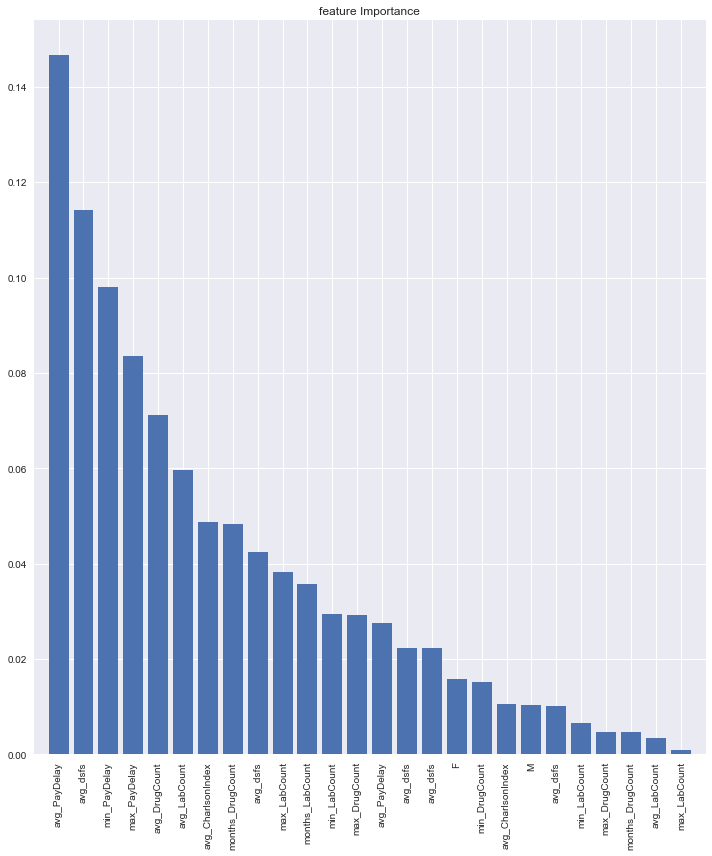

In [89]:
plt.figure(figsize = (10, 12))
plt.title("feature Importance")
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align="center")
plt.xticks(range(X_train.shape[1]),
          feat_labels_new,rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

## Cross Validation-Algorithms Comparison

In [90]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet,LogisticRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
# load dataset
X=X_train
Y=y_train.astype("int")
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LIN', LinearRegression()))
models.append(('SGDRG', SGDRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('NN',MLPRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('XGB', XGBRegressor()))
# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'
#Standardize the data
for name, model in models:
    kfold = KFold(n_splits=5, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    baseline_train_score = np.sqrt(-cv_results.mean())
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, baseline_train_score, cv_results.std())
    print(msg)


C:\Users\Sojan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LR: 0.367065 (0.003494)
LIN: 0.340258 (0.003041)
SGDRG: 0.342161 (0.002981)
RF: 0.366480 (0.003202)
LDA: 0.402944 (0.007273)
GBR: 0.338715 (0.003136)
NN: 0.341977 (0.003411)
DT: 0.495832 (0.003085)
XGB: 0.338565 (0.003123)


In [75]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet,LogisticRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
# load dataset
X=X_train
Y=y_train.astype("int")
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LIN', LinearRegression()))
models.append(('SGDRG', SGDRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GBR', GradientBoostingRegressor()))
#models.append(('NN',MLPRegressor()))
models.append(('DT', DecisionTreeRegressor()))
#models.append(('XGB', XGBRegressor()))
# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'
#Standardize the data
for name, model in models:
    kfold = KFold(n_splits=5, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    baseline_train_score = np.sqrt(-cv_results.mean())
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, baseline_train_score, cv_results.std())
    print(msg)


LR: 0.367065 (0.003494)
LIN: 0.340257 (0.003043)
SGDRG: 0.342835 (0.004100)
RF: 0.366042 (0.003004)
LDA: 0.402944 (0.007273)
GBR: 0.338713 (0.003134)
DT: 0.496390 (0.003379)


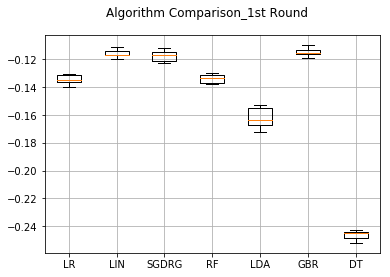

In [76]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison_1st Round')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.grid()
pyplot.show()

## Full Pipeline

### SGDRegressor by different features

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin

# find the indices to the top ranking input features based on importance 
#    arr is an array of feature importances in order of the input data matrix X
#    k is the number of features to be selected
#
# Note: this feature selector assumes that you have already computed the feature importances 
# somehow (for example using SelectKBest or through a RandomForestRegressor decision tree ensemble). 
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    # select the columns of data matrix of the selected input features 
    def transform(self, X):
        return X[:, self.feature_indices_]

In [5]:
#record the results
results = pd.DataFrame(columns=["ExpID","# of features","Train RMSE (Mean)",
                                "Test RMSE", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])

In [6]:
#feature selection from above 
featureScores=forest.feature_importances_
for kk in range(1,X_train.shape[1]+1):
    full_pipeline = Pipeline([
            ("std_scaler", StandardScaler()),
            ('feature_selection', TopFeatureSelector(featureScores,k=kk)),
            #('RFR', RandomForestRegressor()),
            ('SGD', SGDRegressor())
        ])

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    baseline_scores = cross_val_score(full_pipeline, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    baseline_train_score = np.sqrt(-baseline_scores.mean())

    start = time()
    full_pipeline.fit(X_train, y_train)
    baseline_train_predict = full_pipeline.fit(X_train, y_train)
    train_time = np.round(time()-start,3)

    start = time()
    baseline_test_predict = full_pipeline.predict(X_val)
    baseline_test_score = np.sqrt(mean_squared_error(y_val, baseline_test_predict))
    test_time = np.round(time()-start,3)
    results.loc[kk-1] = ["SGDRegressor", kk, round(baseline_train_score, 4), 
                      round(baseline_test_score, 4), "---", train_time, test_time, "Default Parameters"]
results

,ExpID,# of features,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,SGDRegressor,1,0.4818,0.4792,---,0.260,0.01,Default Parameters
1,SGDRegressor,2,0.4786,0.4751,---,0.290,0.01,Default Parameters
2,SGDRegressor,3,0.4781,0.4748,---,0.320,0.01,Default Parameters
3,SGDRegressor,4,0.4761,0.4731,---,0.321,0.00,Default Parameters
4,SGDRegressor,5,0.4735,0.4700,---,0.422,0.01,Default Parameters
5,SGDRegressor,6,0.4731,0.4700,---,0.392,0.00,Default Parameters
6,SGDRegressor,7,0.4722,0.4686,---,0.360,0.01,Default Parameters
7,SGDRegressor,8,0.4721,0.4690,---,0.330,0.00,Default Parameters
8,SGDRegressor,9,0.4717,0.4685,---,0.360,0.01,Default Parameters
9,SGDRegressor,10,0.4714,0.4681,---,0.380,0.01,Default Parameters


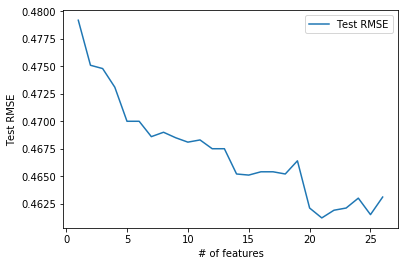

In [7]:
plt.plot(results.iloc[:,1],results.iloc[:,3])
plt.ylabel('Test RMSE')
plt.xlabel('# of features')
plt.legend(loc='best')
plt.show()

** From SGDRegressor we found out that k=21 performed the best**

### LinearRegression by different features

In [10]:
#feature selection from above 
featureScores=forest.feature_importances_
for kk in range(1,X_train.shape[1]+1):
    full_pipeline = Pipeline([
            ("std_scaler", StandardScaler()),
            ('feature_selection', TopFeatureSelector(featureScores,k=kk)),
            #('RFR', RandomForestRegressor()),
            ('LIN', LinearRegression())
        ])

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    baseline_scores = cross_val_score(full_pipeline, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    baseline_train_score = np.sqrt(-baseline_scores.mean())

    start = time()
    full_pipeline.fit(X_train, y_train)
    baseline_train_predict = full_pipeline.fit(X_train, y_train)
    train_time = np.round(time()-start,3)

    start = time()
    baseline_test_predict = full_pipeline.predict(X_val)
    baseline_test_score = np.sqrt(mean_squared_error(y_val, baseline_test_predict))
    test_time = np.round(time()-start,3)
    results.loc[kk-1] = ["LinearRegression", kk, round(baseline_train_score, 4), 
                      round(baseline_test_score, 4), "---", train_time, test_time, "Default Parameters"]
results

,ExpID,# of features,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,LinearRegression,1,0.4818,0.4791,---,0.140,0.01,Default Parameters
1,LinearRegression,2,0.4785,0.4750,---,0.140,0.01,Default Parameters
2,LinearRegression,3,0.4779,0.4743,---,0.160,0.01,Default Parameters
3,LinearRegression,4,0.4759,0.4728,---,0.160,0.01,Default Parameters
4,LinearRegression,5,0.4730,0.4698,---,0.170,0.00,Default Parameters
5,LinearRegression,6,0.4729,0.4696,---,0.170,0.00,Default Parameters
6,LinearRegression,7,0.4717,0.4683,---,0.180,0.01,Default Parameters
7,LinearRegression,8,0.4717,0.4682,---,0.200,0.01,Default Parameters
8,LinearRegression,9,0.4711,0.4678,---,0.190,0.01,Default Parameters
9,LinearRegression,10,0.4708,0.4676,---,0.200,0.00,Default Parameters


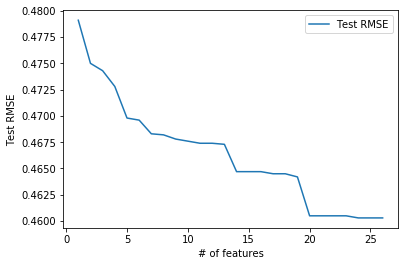

In [11]:
plt.plot(results.iloc[:,1],results.iloc[:,3])
plt.ylabel('Test RMSE')
plt.xlabel('# of features')
plt.legend(loc='best')
plt.show()

** From above plot, we can find that k=20,21 performed well. So we can use k=21 as our best model in feature selection**

### GridSearchCV for parameter tuning

In [18]:
#Record results
results = pd.DataFrame(columns=["ExpID", "Train RMSE (Mean)", "Test RMSE", "p-value", 
                                "Train Time(s)", "TestTime(s)", "Experiment description"])

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    #{'LOG__penalty': ['l1','l2'], 'LOG__C': [1, 10, 100, 1000]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'SGD__loss':['squared_loss','huber','epsilon_insensitive'],'SGD__penalty':['l1','l2','elasticnet']}
  ]

full_pipeline = Pipeline([
        ("std_scaler", StandardScaler()),
        ('feature_selection', TopFeatureSelector(featureScores,k=21)),
        #('RFR', RandomForestRegressor()),
        ('SGD', SGDRegressor())
    ])
#forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(full_pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
start = time()
grid_search.fit(X_train, y_train.astype("int"))
baseline_train_score = np.sqrt(-grid_search.best_score_)
train_time = np.round(time()-start,3)
final_model = grid_search.best_estimator_

start = time()
baseline_test_predict = final_model.predict(X_val)
baseline_test_score = np.sqrt(mean_squared_error(y_val, baseline_test_predict))
test_time = np.round(time()-start,3)

results.loc[len(results)] = ["SGD", round(baseline_train_score, 4), 
                  round(baseline_test_score, 4), "---", train_time, test_time, "After Hyper Parameter Tuning"]
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),TestTime(s),Experiment description
0,SGD,0.3412,0.4689,---,15.578,0.01,After Hyper Parameter Tuning


In [20]:
grid_search.best_params_

{'SGD__loss': 'squared_loss', 'SGD__penalty': 'elasticnet'}

In [21]:
#Try default SGDRegressor
full_pipeline = Pipeline([
        ("std_scaler", StandardScaler()),
        ('feature_selection', TopFeatureSelector(featureScores,k=21)),
        #('RFR', RandomForestRegressor()),
        ('SGD', SGDRegressor())
    ])

start = time()
full_pipeline.fit(X_train, y_train.astype("int"))
baseline_train_score = np.sqrt(-grid_search.best_score_)
train_time = np.round(time()-start,3)

start = time()
baseline_test_predict = full_pipeline.predict(X_val)
baseline_test_score = np.sqrt(mean_squared_error(y_val, baseline_test_predict))
test_time = np.round(time()-start,3)

results.loc[len(results)] = ["SGD", round(baseline_train_score, 4), 
                  round(baseline_test_score, 4), "---", train_time, test_time, "Default parameters with feature selection"]
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),TestTime(s),Experiment description
0,SGD,0.3412,0.4689,---,15.578,0.010,After Hyper Parameter Tuning
1,SGD,0.3412,0.4706,---,0.280,0.068,Default parameters with feature selection


### RandomForestRegressor with feature selection

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    #{'LOG__penalty': ['l1','l2'], 'LOG__C': [1, 10, 100, 1000]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'RF__bootstrap': [False,True], 'RF__n_estimators': [10,30,50,100], 'RF__max_features': [2, 3, 4, 5]},
  ]
full_pipeline = Pipeline([
        ("std_scaler", StandardScaler()),
        ('feature_selection', TopFeatureSelector(featureScores,k=21)),
        #('RFR', RandomForestRegressor()),
        ('RF', RandomForestRegressor())
    ])
#forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(full_pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
start = time()
grid_search.fit(X_train, y_train.astype("int"))
baseline_train_score = np.sqrt(-grid_search.best_score_)
train_time = np.round(time()-start,3)
final_model = grid_search.best_estimator_

start = time()
baseline_test_predict = final_model.predict(X_val)
baseline_test_score = np.sqrt(mean_squared_error(y_val, baseline_test_predict))
test_time = np.round(time()-start,3)
results.loc[len(results)] = ["RF", round(baseline_train_score, 4), 
                  round(baseline_test_score, 4), "---", train_time, test_time, "After Hyper Parameter Tuning"]
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),TestTime(s),Experiment description
0,SGD,0.3412,0.4689,---,15.578,0.010,After Hyper Parameter Tuning
1,SGD,0.3412,0.4706,---,0.280,0.068,Default parameters with feature selection
2,RF,0.3441,0.4697,---,1224.506,0.560,After Hyper Parameter Tuning


In [31]:
grid_search.best_params_

{'RF__bootstrap': True, 'RF__max_features': 2, 'RF__n_estimators': 100}

In [28]:
#Try default RandomForestRegressor with feature selection
full_pipeline = Pipeline([
        ("std_scaler", StandardScaler()),
        ('feature_selection', TopFeatureSelector(featureScores,k=21)),
        #('RFR', RandomForestRegressor()),
        ('RF', RandomForestRegressor())
    ])

start = time()
full_pipeline.fit(X_train, y_train.astype("int"))
baseline_train_predict = full_pipeline.predict(X_train)
baseline_train_score = np.sqrt(mean_squared_error(y_train, baseline_train_predict))
#baseline_train_score = np.sqrt(-full_pipeline.predict(X_train))
train_time = np.round(time()-start,3)

start = time()
baseline_test_predict = full_pipeline.predict(X_val)
baseline_test_score = np.sqrt(mean_squared_error(y_val, baseline_test_predict))
test_time = np.round(time()-start,3)
results.loc[len(results)] = ["RF", round(baseline_train_score, 4), 
                  round(baseline_test_score, 4), "---", train_time, test_time, "Default parameters with feature selection"]
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),TestTime(s),Experiment description
0,SGD,0.3412,0.4689,---,15.578,0.010,After Hyper Parameter Tuning
1,SGD,0.3412,0.4706,---,0.280,0.068,Default parameters with feature selection
2,RF,0.3441,0.4697,---,1224.506,0.560,After Hyper Parameter Tuning
3,RF,0.3077,0.4790,---,7.315,0.050,Default parameters with feature selection


### GradientBoostingRegressor with feature selection

In [32]:
#Try default GradientBoostingRegressor with feature selection first
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

full_pipeline = Pipeline([
        ("std_scaler", StandardScaler()),
        ('feature_selection', TopFeatureSelector(featureScores,k=21)),
        #('RFR', RandomForestRegressor()),
        ('GBR', GradientBoostingRegressor())
    ])
start = time()
full_pipeline.fit(X_train, y_train.astype("int"))
baseline_train_predict = full_pipeline.predict(X_train)
baseline_train_score = np.sqrt(mean_squared_error(y_train, baseline_train_predict))
train_time = np.round(time()-start,3)

start = time()
baseline_test_predict = full_pipeline.predict(X_val)
baseline_test_score = np.sqrt(mean_squared_error(y_val, baseline_test_predict))
test_time = np.round(time()-start,3)
results.loc[len(results)] = ["GBR", round(baseline_train_score, 4), 
                  round(baseline_test_score, 4), "---", train_time, test_time, "Default parameters with feature selection"]
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),TestTime(s),Experiment description
0,SGD,0.3412,0.4689,---,15.578,0.010,After Hyper Parameter Tuning
1,SGD,0.3412,0.4706,---,0.280,0.068,Default parameters with feature selection
2,RF,0.3441,0.4697,---,1224.506,0.560,After Hyper Parameter Tuning
3,RF,0.3077,0.4790,---,7.315,0.050,Default parameters with feature selection
4,GBR,0.4685,0.4663,---,14.811,0.040,Default parameters with feature selection


In [35]:
#hyper parameter tuning-01

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    #{'LOG__penalty': ['l1','l2'], 'LOG__C': [1, 10, 100, 1000]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'GBR__n_estimators':[50,60,70,80,90,100,110]},
  ]
full_pipeline = Pipeline([
        ("std_scaler", StandardScaler()),
        ('feature_selection', TopFeatureSelector(featureScores,k=21)),
        #('RFR', RandomForestRegressor()),
        ('GBR', GradientBoostingRegressor())
    ])
#forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(full_pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
start = time()
grid_search.fit(X_train, y_train.astype("int"))
baseline_train_score = np.sqrt(-grid_search.best_score_)
train_time = np.round(time()-start,3)
final_model = grid_search.best_estimator_

start = time()
baseline_test_predict = final_model.predict(X_val)
baseline_test_score = np.sqrt(mean_squared_error(y_val, baseline_test_predict))
test_time = np.round(time()-start,3)
results.loc[len(results)] = ["GBR", round(baseline_train_score, 4), 
                  round(baseline_test_score, 4), "---", train_time, test_time, "After Hyper Parameter Tuning"]
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),TestTime(s),Experiment description
0,SGD,0.3412,0.4689,---,15.578,0.010,After Hyper Parameter Tuning
1,SGD,0.3412,0.4706,---,0.280,0.068,Default parameters with feature selection
2,RF,0.3441,0.4697,---,1224.506,0.560,After Hyper Parameter Tuning
3,RF,0.3077,0.4790,---,7.315,0.050,Default parameters with feature selection
4,GBR,0.4685,0.4663,---,14.811,0.040,Default parameters with feature selection
5,GBR,0.3386,0.4663,---,255.779,0.040,After Hyper Parameter Tuning


In [36]:
grid_search.best_params_

{'GBR__n_estimators': 100}

In [41]:
#hyper parameter tuning-03

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    #{'LOG__penalty': ['l1','l2'], 'LOG__C': [1, 10, 100, 1000]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'GBR__n_estimators':[100],'GBR__max_depth':range(3,10,2),'GBR__min_samples_split':range(500,801,100)},
  ]
full_pipeline = Pipeline([
        ("std_scaler", StandardScaler()),
        ('feature_selection', TopFeatureSelector(featureScores,k=21)),
        #('RFR', RandomForestRegressor()),
        ('GBR', GradientBoostingRegressor())
    ])
#forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(full_pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
start = time()
grid_search.fit(X_train, y_train.astype("int"))
baseline_train_score = np.sqrt(-grid_search.best_score_)
train_time = np.round(time()-start,3)
final_model = grid_search.best_estimator_

start = time()
baseline_test_predict = final_model.predict(X_val)
baseline_test_score = np.sqrt(mean_squared_error(y_val, baseline_test_predict))
test_time = np.round(time()-start,3)
results.loc[len(results)] = ["GBR", round(baseline_train_score, 4), 
                  round(baseline_test_score, 4), "---", train_time, test_time, "After Hyper Parameter second Tuning"]
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),TestTime(s),Experiment description
0,SGD,0.3412,0.4689,---,15.578,0.010,After Hyper Parameter Tuning
1,SGD,0.3412,0.4706,---,0.280,0.068,Default parameters with feature selection
2,RF,0.3441,0.4697,---,1224.506,0.560,After Hyper Parameter Tuning
3,RF,0.3077,0.4790,---,7.315,0.050,Default parameters with feature selection
4,GBR,0.4685,0.4663,---,14.811,0.040,Default parameters with feature selection
5,GBR,0.3386,0.4663,---,255.779,0.040,After Hyper Parameter Tuning
6,GBR,0.3384,0.4656,---,1770.365,0.070,After Hyper Parameter second Tuning


In [42]:
grid_search.best_params_

{'GBR__max_depth': 5, 'GBR__min_samples_split': 600, 'GBR__n_estimators': 100}

### Baseline model without feature selection

In [44]:
from sklearn.dummy import DummyRegressor
model = DummyRegressor(strategy='mean')
#cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
baseline_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
baseline_train_score = np.sqrt(-baseline_scores.mean())

start = time()
model.fit(X_train, y_train)
baseline_train_predict = model.fit(X_train, y_train)
train_time = np.round(time()-start,3)

start = time()
baseline_test_predict = model.predict(X_val)
baseline_test_score = np.sqrt(mean_squared_error(y_val, baseline_test_predict))
test_time = np.round(time()-start,3)

In [45]:
#results = pd.DataFrame(columns=["ExpID", "Train RMSE (Mean)", "Test RMSE", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])
results.loc[len(results)] = ["Baseline Model (Mean)", round(baseline_train_score, 4), round(baseline_test_score, 4), "---", train_time, test_time, "Predict mean of target values"]

In [46]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),TestTime(s),Experiment description
0,SGD,0.3412,0.4689,---,15.578,0.010,After Hyper Parameter Tuning
1,SGD,0.3412,0.4706,---,0.280,0.068,Default parameters with feature selection
2,RF,0.3441,0.4697,---,1224.506,0.560,After Hyper Parameter Tuning
3,RF,0.3077,0.4790,---,7.315,0.050,Default parameters with feature selection
4,GBR,0.4685,0.4663,---,14.811,0.040,Default parameters with feature selection
5,GBR,0.3386,0.4663,---,255.779,0.040,After Hyper Parameter Tuning
6,GBR,0.3384,0.4656,---,1770.365,0.070,After Hyper Parameter second Tuning
7,Baseline Model (Mean),0.4818,0.4791,---,0.000,0.000,Predict mean of target values


### Linear Regression model feature selection

In [47]:
#Try default LinearRegression without feature selection
full_pipeline = Pipeline([
        ("std_scaler", StandardScaler()),
        ('LR', LinearRegression())
    ])
start = time()
full_pipeline.fit(X_train, y_train.astype("int"))
baseline_train_predict = full_pipeline.predict(X_train)
baseline_train_score = np.sqrt(mean_squared_error(y_train, baseline_train_predict))
train_time = np.round(time()-start,3)

start = time()
baseline_test_predict = full_pipeline.predict(X_val)
baseline_test_score = np.sqrt(mean_squared_error(y_val, baseline_test_predict))
test_time = np.round(time()-start,3)
results.loc[len(results)] = ["LR", round(baseline_train_score, 4), 
                  round(baseline_test_score, 4), "---", train_time, test_time, "Without feature selection"]
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),TestTime(s),Experiment description
0,SGD,0.3412,0.4689,---,15.578,0.010,After Hyper Parameter Tuning
1,SGD,0.3412,0.4706,---,0.280,0.068,Default parameters with feature selection
2,RF,0.3441,0.4697,---,1224.506,0.560,After Hyper Parameter Tuning
3,RF,0.3077,0.4790,---,7.315,0.050,Default parameters with feature selection
4,GBR,0.4685,0.4663,---,14.811,0.040,Default parameters with feature selection
5,GBR,0.3386,0.4663,---,255.779,0.040,After Hyper Parameter Tuning
6,GBR,0.3384,0.4656,---,1770.365,0.070,After Hyper Parameter second Tuning
7,Baseline Model (Mean),0.4818,0.4791,---,0.000,0.000,Predict mean of target values
8,LR,0.4726,0.4687,---,0.260,0.000,Without feature selection


In [48]:
#Try default LinearRegression with feature selection
full_pipeline = Pipeline([
        ("std_scaler", StandardScaler()),
        ('feature_selection', TopFeatureSelector(featureScores,k=21)),
        #('RFR', RandomForestRegressor()),
        ('LR', LinearRegression())
    ])
start = time()
full_pipeline.fit(X_train, y_train.astype("int"))
baseline_train_predict = full_pipeline.predict(X_train)
baseline_train_score = np.sqrt(mean_squared_error(y_train, baseline_train_predict))
train_time = np.round(time()-start,3)

start = time()
baseline_test_predict = full_pipeline.predict(X_val)
baseline_test_score = np.sqrt(mean_squared_error(y_val, baseline_test_predict))
test_time = np.round(time()-start,3)
results.loc[len(results)] = ["LR", round(baseline_train_score, 4), 
                  round(baseline_test_score, 4), "---", train_time, test_time, "Default parameters with feature selection"]
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),TestTime(s),Experiment description
0,SGD,0.3412,0.4689,---,15.578,0.010,After Hyper Parameter Tuning
1,SGD,0.3412,0.4706,---,0.280,0.068,Default parameters with feature selection
2,RF,0.3441,0.4697,---,1224.506,0.560,After Hyper Parameter Tuning
3,RF,0.3077,0.4790,---,7.315,0.050,Default parameters with feature selection
4,GBR,0.4685,0.4663,---,14.811,0.040,Default parameters with feature selection
5,GBR,0.3386,0.4663,---,255.779,0.040,After Hyper Parameter Tuning
6,GBR,0.3384,0.4656,---,1770.365,0.070,After Hyper Parameter second Tuning
7,Baseline Model (Mean),0.4818,0.4791,---,0.000,0.000,Predict mean of target values
8,LR,0.4726,0.4687,---,0.260,0.000,Without feature selection
9,LR,0.4726,0.4689,---,0.292,0.001,Default parameters with feature selection


# Model comparison via statistical significance tests
Build a second model and compare results against baseline using a t-test.

In [53]:
regressors = [
    ('LR(mean)', LinearRegression()),
    ('SGD(mean)',SGDRegressor(loss='squared_loss', penalty= 'elasticnet')),
    ('GBR(mean)',GradientBoostingRegressor(max_depth=5, min_samples_split=600, n_estimators=100)),
    ('RF(mean)', RandomForestRegressor(bootstrap=True, max_features=2, n_estimators=100))
]

for idx, (name, regressor) in enumerate(regressors, 1):
    start = time()
    regressor.fit(X_train, y_train)
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    cv_scores = cross_val_score(regressor, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-cv_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    test_preds = regressor.predict(X_val)
    test_score = np.sqrt(mean_squared_error(y_val, test_preds))
    test_time = np.round(time()-start,3)

    p_value = ttest(baseline_scores, cv_scores)
    results.loc[len(results)] = [ name, round(train_score, 4), round(test_score, 4), round(p_value, 4), 
                                 train_time, test_time, 'Best parameters from above tunning']
results

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-81.80, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-35.10, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-97.07, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-53.61, 0.00000)
Machine learning pipeline B is better than A


,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),TestTime(s),Experiment description
0,SGD,0.3412,0.4689,---,15.578,0.010,After Hyper Parameter Tuning
1,SGD,0.3412,0.4706,---,0.280,0.068,Default parameters with feature selection
2,RF,0.3441,0.4697,---,1224.506,0.560,After Hyper Parameter Tuning
3,RF,0.3077,0.4790,---,7.315,0.050,Default parameters with feature selection
4,GBR,0.4685,0.4663,---,14.811,0.040,Default parameters with feature selection
5,GBR,0.3386,0.4663,---,255.779,0.040,After Hyper Parameter Tuning
6,GBR,0.3384,0.4656,---,1770.365,0.070,After Hyper Parameter second Tuning
7,Baseline Model (Mean),0.4818,0.4791,---,0.000,0.000,Predict mean of target values
8,LR,0.4726,0.4687,---,0.260,0.000,Without feature selection
9,LR,0.4726,0.4689,---,0.292,0.001,Default parameters with feature selection


## Results discussion

Over 10 folds, the GBR with default parameters produced a better model in terms of root mean squared error than the baseline model (mean prediction) . The RMSR of .4568, means the model can predict the number of days a patient will stay in hospital with an error of $e^{.4568^2} - 1 = 0.232$ days. Note that when processing year data, we made log transformation to the `DaysInHospital` variable: `df_target_Y2['label'] = np.log(df_target_Y2['DaysInHospital'] + 1)`.

# Understand your best model and plan further improvements

We can look at the coefficients of our default linear regression model to see how different features are weighted. 

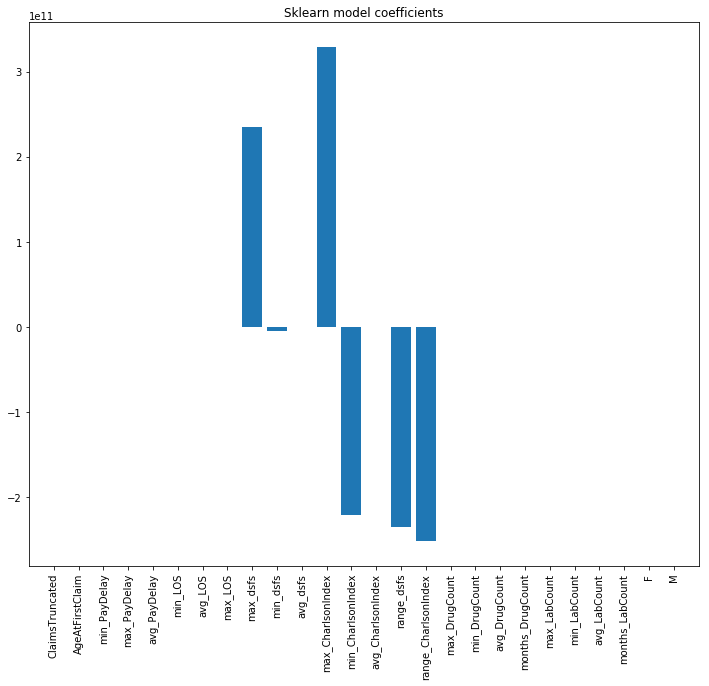

In [69]:
model_lr = LinearRegression()
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
model_lr.fit(X_train_std, y_train)
plt.figure(figsize=(12, 10))
plt.bar(np.arange(model_lr.coef_.shape[0]), model_lr.coef_)
plt.xticks(np.arange(model_lr.coef_.shape[0]), feat_labels, rotation='vertical')
plt.xlim([-1, model_lr.coef_.shape[0]])
plt.title("Sklearn model coefficients");

In [71]:
# features sorted by coefficient size
lr_model = dict(zip(feat_labels, model_lr.coef_))
coefs = sorted(lr_model.items(), key=lambda x: np.abs(x[1]), reverse=True)
display(pd.DataFrame(coefs, columns=['Features','Coefficients']))

,Features,Coefficients
0,max_CharlsonIndex,3.286466e+11
1,range_CharlsonIndex,-2.519886e+11
2,max_dsfs,2.352587e+11
3,range_dsfs,-2.351508e+11
4,min_CharlsonIndex,-2.211888e+11
5,min_dsfs,-5.324965e+09
6,M,-8.493728e-02
7,F,-7.496212e-02
8,ClaimsTruncated,4.807494e-02
9,max_LOS,3.203473e-02


### Recursive Feature Elimination

In [117]:
from sklearn.feature_selection import RFE
model=GradientBoostingRegressor()
rfe = RFE(model, 20)
fit = rfe.fit(X_train,y_train)
print("Num Features:",fit.n_features_)
print("Selected Features:",fit.support_)
print("Feature Ranking:",fit.ranking_)




Num Features: 20
Selected Features: [ True  True  True  True  True False  True  True False False  True  True
 False  True  True  True  True False  True  True  True False  True  True
  True  True]
Feature Ranking: [1 1 1 1 1 2 1 1 4 3 1 1 7 1 1 1 1 5 1 1 1 6 1 1 1 1]


# Further Improvement

## Build additional claims features 

In [6]:
# Build two features based on ideas developed in Phase 1 (via pipeline)

class NewClaimsFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        # categorize members based on number of claims submitted
        claims_dict = dict(X['MemberID'].value_counts())
        X['ClaimsCategory'] = X['MemberID'].apply(lambda x: claims_dict[x])
        low = np.where(X['ClaimsCategory']<5)[0]
        med = np.where((X['ClaimsCategory']>=5) & (X['ClaimsCategory']<40))[0]
        high = np.where(X['ClaimsCategory']>=40)[0]
        X['ClaimsCategory'].loc[low] = 0
        X['ClaimsCategory'].loc[med] = 1
        X['ClaimsCategory'].loc[high] = 2
 
        # Categorize length of stay as 0, 1 or 2
        X['LOS'] = np.where(X['LengthOfStay'].isnull(), 0, X['LengthOfStay'])
        X['LOS'] = np.where(X['LengthOfStay'] > 1, 2, X['LengthOfStay'])
        return X

In [7]:
# Recreate aggregator function to include additional features in final dataframe (via pipeline)
class ClaimAggregater(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        agg_op_dt_claim = {
            'PayDelay': {
                'max_PayDelay': 'max',
                'min_PayDelay': 'min',
                'avg_PayDelay': 'mean'
            },
            'LengthOfStay': {
                'LengthOfStay': 'mean'
            },
            'DSFS': {
                'max_dsfs': 'max',
                'min_dsfs': 'min',
                'avg_dsfs': 'mean'
            },
            'CharlsonIndex': {
                'max_CharlsonIndex': 'max',
                'min_CharlsonIndex': 'min',
                'avg_CharlsonIndex': 'mean'
            },
            'ClaimsCategory': {
                'ClaimsCategory': 'mean'
            },
        }
        result = X.groupby(['Year', 'MemberID']).agg(agg_op_dt_claim)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=['Year', 'MemberID'])
        result['range_dsfs'] = result['max_dsfs'] - result['min_dsfs']
        result['range_CharlsonIndex'] = result['max_CharlsonIndex'] - result['min_CharlsonIndex']
        return result

In [8]:
# reload claims data and rerun the enhanced pipeline
df_claims = load_data(os.path.join(DATA_DIR, 'Claims.csv'), 'claims')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668990 entries, 0 to 2668989
Data columns (total 14 columns):
MemberID                 int64
ProviderID               float64
Vendor                   float64
PCP                      float64
Year                     object
Specialty                object
PlaceSvc                 object
PayDelay                 object
LengthOfStay             object
DSFS                     object
PrimaryConditionGroup    object
CharlsonIndex            object
ProcedureGroup           object
SupLOS                   int64
dtypes: float64(3), int64(2), object(9)
memory usage: 285.1+ MB
None


,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,Y3,Internal,Office,50,NaN,7- 8 months,NEUMENT,1-2,EM,0


In [9]:
claim_pipeline = Pipeline([
    ('claim_adder', ClaimAttributesAdder()),
    ('claim_features', NewClaimsFeatures()),
    ('claim_aggregater', ClaimAggregater()),
    ])
df_claims_aggregated = claim_pipeline.transform(df_claims)

In [10]:
# 1. Union Target DataFrames Across Years
df_merged_02 = pd.concat([df_target_Y2, df_target_Y3])

# 2. Join/Merge in Members Data
df_merged_02 = df_merged_02.merge(df_members, how='left', on='MemberID')

# 3. Join/Merge in Aggregated Claims Data
df_merged_02 = df_merged_02.merge(df_claims_aggregated, how='left', on=['MemberID', 'Year'])

# 4. Join/Merge in Aggregated Drug Data
df_merge_02d = df_merged_02.merge(df_drug_count_aggregated, how='left', on=['MemberID', 'Year'])

# 5. Join/Merge in Aggregated Lab Data
df_merged_02 = df_merged_02.merge(df_lab_count_aggregated, how='left', on=['MemberID', 'Year'])


In [11]:
# drop columns we will not be using for analysis
df_final_02 = df_merged_02.drop(['MemberID', 'DaysInHospital', 'Year'], axis=1)
df_final_02.shape

(147473, 22)

In [12]:
# split data into a trainin set (70%), validation set (15%) and blind (holdout) test set (15%)
df_train_02, df_other_02 = train_test_split(df_final_02, test_size=0.3, random_state=42)
df_val_02, df_test_02 = train_test_split(df_other_02, test_size=0.5, random_state=42)

In [13]:
print(df_train_02.shape)
print(df_val_02.shape)
print(df_test_02.shape)

(103231, 22)
(22121, 22)
(22121, 22)


In [14]:
# separate target data in y variables
y_train_02 = df_train_02['label']
y_val_02 = df_val_02['label']
y_test_02 = df_test_02['label']

In [15]:
# Identify the numeric features we wish to consider (note: we will not include 'label' as this is our target). 
num_attribs = ['ClaimsTruncated', 'AgeAtFirstClaim', 'max_PayDelay', 'min_PayDelay', 'avg_PayDelay', 
               'LengthOfStay', 'max_dsfs', 'min_dsfs', 'avg_dsfs', 'max_CharlsonIndex', 'min_CharlsonIndex',
               'avg_CharlsonIndex', 'ClaimsCategory', 'range_dsfs', 'range_CharlsonIndex', 'max_LabCount', 'min_LabCount',
               'avg_LabCount', 'months_LabCount']

# Create a pipeline for the numeric features.
# Missing values will be imputed using the feature median.
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# Identify the categorical features we wish to consider.
cat_attribs = [
    'F','M'
]

# Identiy the range of expected values for the categorical features.
cat_values = [
    ['Sex_f', 'Sex_male']  # Sex
]

# Create a pipelne for the categorical features.
# Since we already transformed the 'sex' feature in section 2.2.5, we need only select the new OHE features.  
# We have done the label encoding and OHE here as part of our preprocessing pipeline.
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
    ])

# combined all attributes matching final numpy array
df_attribs = num_attribs+cat_attribs

# Union the transformed, scaled numeric and categorical features.
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])


In [16]:
# Use full processing pipeline to create final X_train, X_val and X_test datasets
X_train_02 = full_pipeline.fit_transform(df_train_02)
X_val_02 = full_pipeline.transform(df_val_02)
X_test_02 = full_pipeline.transform(df_test_02)

In [17]:
df_train_02.columns

Index(['ClaimsTruncated', 'label', 'AgeAtFirstClaim', 'F', 'M', 'max_PayDelay',
       'min_PayDelay', 'avg_PayDelay', 'LengthOfStay', 'max_dsfs', 'min_dsfs',
       'avg_dsfs', 'max_CharlsonIndex', 'min_CharlsonIndex',
       'avg_CharlsonIndex', 'ClaimsCategory', 'range_dsfs',
       'range_CharlsonIndex', 'max_LabCount', 'min_LabCount', 'avg_LabCount',
       'months_LabCount'],
      dtype='object')

## Evaluate some more default models

In [73]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet,LogisticRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
# load dataset
X=X_train_02
Y=y_train_02.astype("int")
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LIN', LinearRegression()))
models.append(('SGDRG', SGDRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('NN',MLPRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('XGB', XGBRegressor()))
# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'
#Standardize the data
for name, model in models:
    kfold = KFold(n_splits=5, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    baseline_train_score = np.sqrt(-cv_results.mean())
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, baseline_train_score, cv_results.std())
    print(msg)


LR: 0.366841 (0.003210)
LIN: 0.340008 (0.003027)
SGDRG: 0.340764 (0.003126)
RF: 0.364969 (0.003106)
LDA: 0.397608 (0.008427)
GBR: 0.336700 (0.002993)
NN: 0.339246 (0.003084)
DT: 0.492024 (0.001005)
XGB: 0.336723 (0.003064)


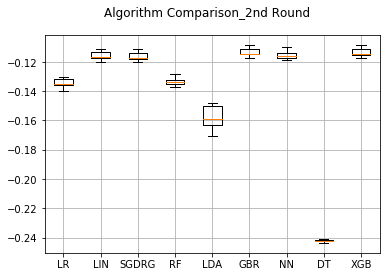

In [74]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison_2nd Round')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.grid()
pyplot.show()

### Baseline model with new features

In [79]:
from sklearn.dummy import DummyRegressor
model = DummyRegressor(strategy='mean')
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
baseline_scores = cross_val_score(model, X_train_02, y_train_02, cv=cv, scoring='neg_mean_squared_error')
baseline_train_score = np.sqrt(-baseline_scores.mean())

start = time()
model.fit(X_train_02, y_train_02)
baseline_train_predict = model.fit(X_train_02, y_train_02)
train_time = np.round(time()-start,3)

start = time()
baseline_test_predict = model.predict(X_val_02)
baseline_test_score = np.sqrt(mean_squared_error(y_val_02, baseline_test_predict))
test_time = np.round(time()-start,3)

In [81]:
#record the results
results = pd.DataFrame(columns=["ExpID","Train RMSE (Mean)",
                                "Test RMSE", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])
results.loc[len(results)]= ["Baseline Model (Mean)_2nd Round", round(baseline_train_score, 4), 
                            round(baseline_test_score, 4), "---", train_time, test_time, 
                            "default parameters with new features"]

In [82]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean)_2nd Round,0.4818,0.4791,---,0.0,0.0,default parameters with new features


In [83]:
regressors = [
    ('LR_2nd Round', LinearRegression()),
    ('SGD_2nd Round',SGDRegressor()),
    ('GBR_2nd Round',GradientBoostingRegressor()),
    ('NN_2nd Round',MLPRegressor()),
    ('XGB_2nd Round', XGBRegressor())
]

for idx, (name, regressor) in enumerate(regressors, 1):
    start = time()
    regressor.fit(X_train_02, y_train_02)
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    cv_scores = cross_val_score(regressor, X_train_02, y_train_02, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-cv_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    test_preds = regressor.predict(X_val_02)
    test_score = np.sqrt(mean_squared_error(y_val_02, test_preds))
    test_time = np.round(time()-start,3)

    p_value = ttest(baseline_scores, cv_scores)
    results.loc[len(results)+1] = [ name, round(train_score, 4), round(test_score, 4), 
                                   round(p_value, 4), train_time, test_time, 'Default parameters with new features']
results

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-82.40, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-53.79, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-120.73, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-35.77, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-116.62, 0.00000)
Machine learning pipeline B is better than A


,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean)_2nd Round,0.4818,0.4791,---,0.000,0.000,default parameters with new features
2,LR_2nd Round,0.4634,0.4601,0,1.279,0.002,Default parameters with new features
3,SGD_2nd Round,0.4647,0.4611,0,1.602,0.010,Default parameters with new features
4,GBR_2nd Round,0.4584,0.4545,0,110.225,0.030,Default parameters with new features
5,NN_2nd Round,0.4611,0.4576,0,60.216,0.040,Default parameters with new features
6,XGB_2nd Round,0.4583,0.4545,0,43.130,0.050,Default parameters with new features


## Use PCA to develop further insight into feature importance and feature selection

In [84]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
sc=StandardScaler()
X_train_std_02=sc.fit_transform(X_train_02)
X_train_pca=pca.fit_transform(X_train_std_02)
pca.explained_variance_ratio_

array([  2.66444031e-01,   1.19137949e-01,   9.62021160e-02,
         8.71219286e-02,   7.40322647e-02,   5.73455996e-02,
         5.07972958e-02,   4.74922925e-02,   4.64884647e-02,
         3.61457983e-02,   3.03341510e-02,   2.67111054e-02,
         2.22456420e-02,   1.28333546e-02,   1.16002110e-02,
         6.34129139e-03,   4.87352516e-03,   2.65530657e-03,
         1.19767338e-03,   6.22657186e-30,   5.58146043e-31])

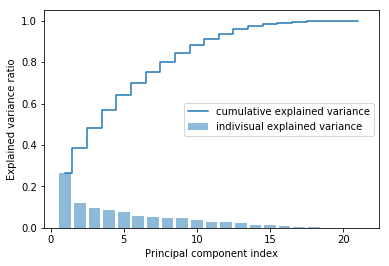

In [85]:
import matplotlib.pyplot as plt
var_exp=pca.explained_variance_ratio_
cum_var_exp=np.cumsum(var_exp)
plt.bar(range(1,X_train_02.shape[1]+1),var_exp,alpha=0.5,align='center',
       label='indivisual explained variance')
plt.step(range(1,X_train_02.shape[1]+1),cum_var_exp,where='mid',
        label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [86]:
n_components = []
for n in range(len(pca.components_[0])):
    n_components.append('c'+str(n+1))

# index is columns - 1 because we removed "labels" in the full pipeline
pca_loadings = pd.DataFrame(pca.components_.T, index=df_attribs, columns=n_components)
print('\nLoadings for the top 10 principal components')
pca_loadings.iloc[:,:10]


Loadings for the top 10 principal components


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
ClaimsTruncated,0.189401,-0.012845,0.086731,-0.039189,0.038180,0.573260,0.058532,0.033118,-0.085154,-0.064432
AgeAtFirstClaim,0.249271,0.093190,-0.004174,0.013303,0.042166,-0.061585,-0.022415,-0.004792,-0.005041,-0.725854
max_PayDelay,0.198008,-0.112522,0.255982,0.430519,-0.127060,-0.052070,-0.005112,-0.030319,0.027959,-0.180916
min_PayDelay,-0.186520,-0.063274,0.430042,0.272228,-0.013007,0.047049,0.069878,0.036147,-0.077058,0.159969
avg_PayDelay,-0.030050,-0.120519,0.470830,0.489378,-0.096978,-0.058338,0.033216,0.011774,-0.001679,-0.004042
LengthOfStay,0.045285,-0.020722,0.042496,0.011843,0.034617,0.121749,-0.150110,-0.819353,0.514003,0.083620
max_dsfs,0.347457,-0.147612,-0.208962,0.125099,-0.209361,-0.129410,0.054952,0.018444,0.016825,0.183693
min_dsfs,0.026152,0.007659,0.018668,-0.006860,0.007352,0.263629,0.357739,0.448136,0.755138,-0.012859
avg_dsfs,0.316281,-0.148370,-0.219245,0.118258,-0.217869,-0.136739,0.076339,0.048254,0.042967,0.244989
max_CharlsonIndex,0.323206,0.093909,0.281323,-0.188627,0.221088,-0.120894,-0.191544,0.099107,0.052890,0.139051


## Extend pipeline using Principal Components with XGB and GBR

### XGB with PCA

In [90]:
#record the results
results = pd.DataFrame(columns=["ExpID","Train RMSE (Mean)",
                                "Test RMSE", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])

In [91]:
from xgboost import XGBRegressor
from tempfile import mkdtemp
from shutil import rmtree

for ncomponents in range(2,22):

    pca_pipeline = Pipeline([('std_scaler', StandardScaler()),
                             ('PCA', PCA(n_components=ncomponents,)),
                             ('XGB', XGBRegressor())])

    start = time()
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    xgb_cv_scores = cross_val_score(pca_pipeline, X_train_02, y_train_02, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-xgb_cv_scores.mean())
    train_time = np.round(time()-start,3)
    
    start = time()
    pca_pipeline.fit(X_train_02, y_train_02)
    test_preds = pca_pipeline.predict(X_val_02)
    test_score = np.sqrt(mean_squared_error(y_val_02, test_preds))
    test_time = np.round(time()-start,3)
    
    p_value = ttest(baseline_scores, xgb_cv_scores)
    results.loc[len(results)+1] = ["XGB_PCA", round(train_score, 4), round(test_score, 4), round(p_value, 4), 
                                 train_time, test_time, ncomponents]    
results

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-61.43, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-61.11, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-63.05, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-85.06, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-75.67, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-67.58, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-78.37, 0.00000)
Machine learning pipeli

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
1,XGB_PCA,0.4705,0.4666,0.0000,22.967,3.050,2
2,XGB_PCA,0.4704,0.4664,0.0000,27.924,3.910,3
3,XGB_PCA,0.4702,0.4662,0.0000,33.625,4.734,4
4,XGB_PCA,0.4683,0.4639,0.0000,40.023,5.590,5
5,XGB_PCA,0.4676,0.4630,0.0000,46.248,6.430,6
6,XGB_PCA,0.4674,0.4628,0.0000,51.976,7.348,7
7,XGB_PCA,0.4659,0.4619,0.0000,57.608,8.181,8
8,XGB_PCA,0.4656,0.4616,0.0000,63.684,9.080,9
9,XGB_PCA,0.4646,0.4603,0.0000,70.168,9.913,10
10,XGB_PCA,0.4644,0.4598,0.0000,75.268,10.650,11


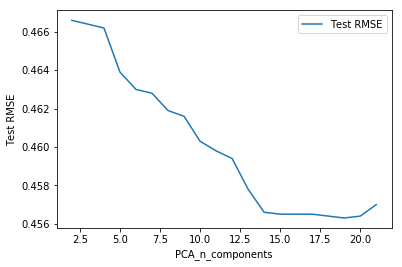

In [93]:
plt.plot(results.iloc[:,6],results.iloc[:,2])
plt.ylabel('Test RMSE')
plt.xlabel('PCA_n_components')
plt.legend(loc='best')
plt.show()

** As to XGB, PCA n_components=15,18 performed well**

### GBR with PCA

In [94]:
#Using GBR Algorithms
#record the results
results = pd.DataFrame(columns=["ExpID","Train RMSE (Mean)",
                                "Test RMSE", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])

for ncomponents in range(2,22):

    pca_pipeline = Pipeline([('std_scaler', StandardScaler()),
                             ('PCA', PCA(n_components=ncomponents,)),
                             ('GBR', GradientBoostingRegressor())])

    start = time()
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    xgb_cv_scores = cross_val_score(pca_pipeline, X_train_02, y_train_02, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-xgb_cv_scores.mean())
    train_time = np.round(time()-start,3)
    
    start = time()
    pca_pipeline.fit(X_train_02, y_train_02)
    test_preds = pca_pipeline.predict(X_val_02)
    test_score = np.sqrt(mean_squared_error(y_val_02, test_preds))
    test_time = np.round(time()-start,3)
    
    p_value = ttest(baseline_scores, xgb_cv_scores)
    results.loc[len(results)+1] = ["GBR_PCA", round(train_score, 4), round(test_score, 4), round(p_value, 4), 
                                 train_time, test_time, ncomponents]    
results

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-60.78, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-70.96, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-57.69, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-86.67, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-70.84, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-66.85, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-85.46, 0.00000)
Machine learning pipeli

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
1,GBR_PCA,0.4706,0.4666,0.0,28.376,4.850,2
2,GBR_PCA,0.4705,0.4663,0.0,38.703,6.832,3
3,GBR_PCA,0.4704,0.4662,0.0,49.661,8.706,4
4,GBR_PCA,0.4686,0.4642,0.0,60.965,10.964,5
5,GBR_PCA,0.4678,0.4632,0.0,72.544,13.098,6
6,GBR_PCA,0.4676,0.4631,0.0,82.714,17.514,7
7,GBR_PCA,0.4661,0.4621,0.0,90.002,16.791,8
8,GBR_PCA,0.4659,0.4620,0.0,99.508,18.977,9
9,GBR_PCA,0.4648,0.4604,0.0,112.193,21.277,10
10,GBR_PCA,0.4646,0.4602,0.0,121.180,23.717,11


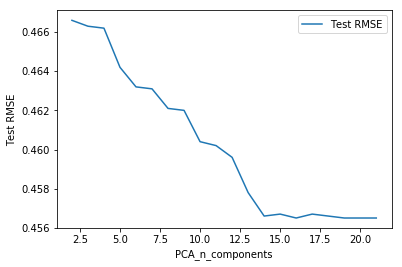

In [95]:
plt.plot(results.iloc[:,6],results.iloc[:,2])
plt.ylabel('Test RMSE')
plt.xlabel('PCA_n_components')
plt.legend(loc='best')
plt.show()

** As to GBR, PCA n_components=16,19 works well**

In [3]:
from sklearn.dummy import DummyRegressor
model = DummyRegressor(strategy='mean')
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
baseline_scores = cross_val_score(model, X_train_02, y_train_02, cv=cv, scoring='neg_mean_squared_error')
baseline_train_score = np.sqrt(-baseline_scores.mean())

start = time()
model.fit(X_train_02, y_train_02)
baseline_train_predict = model.fit(X_train_02, y_train_02)
train_time = np.round(time()-start,3)

start = time()
baseline_test_predict = model.predict(X_val_02)
baseline_test_score = np.sqrt(mean_squared_error(y_val_02, baseline_test_predict))
test_time = np.round(time()-start,3)
#record the results
results = pd.DataFrame(columns=["ExpID","Train RMSE (Mean)",
                                "Test RMSE", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])
results.loc[len(results)]= ["Baseline Model (Mean)_2nd Round", round(baseline_train_score, 4), 
                            round(baseline_test_score, 4), "---", train_time, test_time, 
                            "default parameters with new features"]

In [4]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean)_2nd Round,0.4818,0.4791,---,0.0,0.0,default parameters with new features


In [6]:
#record the results
from sklearn.model_selection import RandomizedSearchCV
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.decomposition import PCA

cachedir = mkdtemp()
pca_pipeline = Pipeline([('std_scaler', StandardScaler()),
                         ('PCA', PCA()),
                         ('XGB', XGBRegressor())], memory=cachedir)

regressors = [('XGBoost (PCA and Best RS)', pca_pipeline)]

params = {'PCA__n_components': [15,18],
          'XGB__learning_rate': list(np.arange(0.01,0.2,.05)),
          'XGB__max_depth': list(range(4,10)),
          'XGB__reg_lambda': list(range(1,10)),
          'XGB__reg_alpha': list(range(1,10))}

for idx, (name, regressor) in enumerate(regressors):
    start = time()
    model = regressor
    rs1 =RandomizedSearchCV(regressor, params, n_iter=10, scoring='neg_mean_squared_error', cv=3, verbose=2)
    rs1.fit(X_train_02, y_train_02)
    model_1 = rs1.best_estimator_
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    xgb_cv_scores = cross_val_score(model_1, X_train_02, y_train_02, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-xgb_cv_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    model_1.fit(X_train_02, y_train_02)
    test_preds = model_1.predict(X_val_02)
    test_score = np.sqrt(mean_squared_error(y_val_02, test_preds))
    test_time = np.round(time()-start,3)
    
    p_value = ttest(baseline_scores, xgb_cv_scores)
    results.loc[len(results)] = [name, round(train_score, 4), round(test_score, 4), round(p_value, 4), 
                                 train_time, test_time, rs1.best_params_]



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] XGB__reg_lambda=3, XGB__reg_alpha=1, XGB__max_depth=8, XGB__learning_rate=0.11, PCA__n_components=18 
[CV]  XGB__reg_lambda=3, XGB__reg_alpha=1, XGB__max_depth=8, XGB__learning_rate=0.11, PCA__n_components=18, total=  31.8s
[CV] XGB__reg_lambda=3, XGB__reg_alpha=1, XGB__max_depth=8, XGB__learning_rate=0.11, PCA__n_components=18 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.3s remaining:    0.0s


[CV]  XGB__reg_lambda=3, XGB__reg_alpha=1, XGB__max_depth=8, XGB__learning_rate=0.11, PCA__n_components=18, total=  31.1s
[CV] XGB__reg_lambda=3, XGB__reg_alpha=1, XGB__max_depth=8, XGB__learning_rate=0.11, PCA__n_components=18 
[CV]  XGB__reg_lambda=3, XGB__reg_alpha=1, XGB__max_depth=8, XGB__learning_rate=0.11, PCA__n_components=18, total=  31.9s
[CV] XGB__reg_lambda=9, XGB__reg_alpha=2, XGB__max_depth=8, XGB__learning_rate=0.06, PCA__n_components=18 
[CV]  XGB__reg_lambda=9, XGB__reg_alpha=2, XGB__max_depth=8, XGB__learning_rate=0.06, PCA__n_components=18, total=  32.7s
[CV] XGB__reg_lambda=9, XGB__reg_alpha=2, XGB__max_depth=8, XGB__learning_rate=0.06, PCA__n_components=18 
[CV]  XGB__reg_lambda=9, XGB__reg_alpha=2, XGB__max_depth=8, XGB__learning_rate=0.06, PCA__n_components=18, total=  32.9s
[CV] XGB__reg_lambda=9, XGB__reg_alpha=2, XGB__max_depth=8, XGB__learning_rate=0.06, PCA__n_components=18 
[CV]  XGB__reg_lambda=9, XGB__reg_alpha=2, XGB__max_depth=8, XGB__learning_rate=0.06

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 13.2min finished


NameError: name 'baseline_scores' is not defined

In [9]:
p_value = ttest(baseline_scores, xgb_cv_scores)
results.loc[len(results)] = [name, round(train_score, 4), round(test_score, 4), round(p_value, 4), 
                             train_time, test_time, rs1.best_params_]

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-84.46, 0.00000)
Machine learning pipeline B is better than A


In [10]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean)_2nd Round,0.4818,0.4791,---,0.0,0.0,default parameters with new features
1,XGBoost (PCA and Best RS),0.4598,0.4557,0,0.0,0.0,"{'XGB__reg_lambda': 1, 'XGB__reg_alpha': 6, 'X..."


In [11]:
#record the results
from sklearn.model_selection import RandomizedSearchCV
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.decomposition import PCA

cachedir = mkdtemp()
pca_pipeline = Pipeline([('std_scaler', StandardScaler()),
                         ('PCA', PCA()),
                         ('GBR', GradientBoostingRegressor())], memory=cachedir)

regressors = [('GBR(PCA and Best RS)', pca_pipeline)]

params = {'PCA__n_components': [15,18],
          'GBR__n_estimators':[100],
          'GBR__max_depth':list(range(3,10,2)),
          'GBR__min_samples_split':list(range(500,801,100)),
          'GBR__learning_rate': list(np.arange(0.01,0.2,.05))}

for idx, (name, regressor) in enumerate(regressors):
    start = time()
    model = regressor
    rs2 =RandomizedSearchCV(regressor, params, n_iter=10, scoring='neg_mean_squared_error', cv=3, verbose=2)
    rs2.fit(X_train_02, y_train_02)
    model_2 = rs2.best_estimator_
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    gbr_cv_scores = cross_val_score(model_2, X_train_02, y_train_02, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-gbr_cv_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    model_2.fit(X_train_02, y_train_02)
    test_preds = model_2.predict(X_val_02)
    test_score = np.sqrt(mean_squared_error(y_val_02, test_preds))
    test_time = np.round(time()-start,3)
    
    p_value = ttest(baseline_scores, gbr_cv_scores)
    results.loc[len(results)] = [name, round(train_score, 4), round(test_score, 4), round(p_value, 4), 
                                 train_time, test_time, rs2.best_params_]



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] PCA__n_components=18, GBR__n_estimators=100, GBR__min_samples_split=800, GBR__max_depth=7, GBR__learning_rate=0.01 
[CV]  PCA__n_components=18, GBR__n_estimators=100, GBR__min_samples_split=800, GBR__max_depth=7, GBR__learning_rate=0.01, total=  43.4s
[CV] PCA__n_components=18, GBR__n_estimators=100, GBR__min_samples_split=800, GBR__max_depth=7, GBR__learning_rate=0.01 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.6s remaining:    0.0s


[CV]  PCA__n_components=18, GBR__n_estimators=100, GBR__min_samples_split=800, GBR__max_depth=7, GBR__learning_rate=0.01, total=  42.7s
[CV] PCA__n_components=18, GBR__n_estimators=100, GBR__min_samples_split=800, GBR__max_depth=7, GBR__learning_rate=0.01 
[CV]  PCA__n_components=18, GBR__n_estimators=100, GBR__min_samples_split=800, GBR__max_depth=7, GBR__learning_rate=0.01, total=  44.2s
[CV] PCA__n_components=15, GBR__n_estimators=100, GBR__min_samples_split=700, GBR__max_depth=3, GBR__learning_rate=0.01 
[CV]  PCA__n_components=15, GBR__n_estimators=100, GBR__min_samples_split=700, GBR__max_depth=3, GBR__learning_rate=0.01, total=  13.6s
[CV] PCA__n_components=15, GBR__n_estimators=100, GBR__min_samples_split=700, GBR__max_depth=3, GBR__learning_rate=0.01 
[CV]  PCA__n_components=15, GBR__n_estimators=100, GBR__min_samples_split=700, GBR__max_depth=3, GBR__learning_rate=0.01, total=  13.7s
[CV] PCA__n_components=15, GBR__n_estimators=100, GBR__min_samples_split=700, GBR__max_depth=

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 18.4min finished


The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-89.13, 0.00000)
Machine learning pipeline B is better than A


In [12]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean)_2nd Round,0.4818,0.4791,---,0.000,0.000,default parameters with new features
1,XGBoost (PCA and Best RS),0.4598,0.4557,0,0.000,0.000,"{'XGB__reg_lambda': 1, 'XGB__reg_alpha': 6, 'X..."
2,GBR(PCA and Best RS),0.4603,0.4561,0,1572.418,72.068,"{'PCA__n_components': 18, 'GBR__n_estimators':..."


In [13]:
print('Best XGBoost was:\n',rs2.best_estimator_)

Best XGBoost was:
 Pipeline(memory='C:\\Users\\hjiang\\AppData\\Local\\Temp\\tmpro_40rk6',
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('PCA', PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('GBR', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
         ...       presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False))])


### XGB with selectKBest feature selection

In [13]:
from sklearn.feature_selection import SelectKBest,f_classif
from xgboost import XGBRegressor
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


cachedir = mkdtemp()
kbest_pipeline = Pipeline([('std_scaler', StandardScaler()),
                           ('KBest', SelectKBest(f_classif )),
                         ('XGB', XGBRegressor())], memory=cachedir)

regressors = [('XGBoost (KBest and Best RS)', kbest_pipeline)]

params = {'XGB__learning_rate': list(np.arange(0.01,0.2,.05)),
          'XGB__max_depth': list(range(4,10)),
          'XGB__reg_lambda': list(range(1,10)),
          'XGB__reg_alpha': list(range(1, 10))}

for idx, (name, regressor) in enumerate(regressors):
    start = time()
    model = regressor
    rs3 =RandomizedSearchCV(regressor, params, n_iter=10, scoring='neg_mean_squared_error', cv=3, verbose=2)
    rs3.fit(X_train_02, y_train_02)
    model_3 = rs3.best_estimator_
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    xgb_cv_scores_skb = cross_val_score(model_3, X_train_02, y_train_02, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-xgb_cv_scores_skb.mean())
    train_time = np.round(time()-start,3)
    start = time()
    model_3.fit(X_train_02, y_train_02)
    test_preds = model_3.predict(X_val_02)
    test_score = np.sqrt(mean_squared_error(y_val_02, test_preds))
    test_time = np.round(time()-start,3)
    
    p_value = ttest(baseline_scores, xgb_cv_scores_skb)
    results.loc[len(results)] = [name, round(train_score, 4), round(test_score, 4), round(p_value, 4), 
                                 train_time, test_time, rs3.best_params_]
    
rmtree(cachedir)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] XGB__reg_lambda=1, XGB__reg_alpha=7, XGB__max_depth=4, XGB__learning_rate=0.06 
[CV]  XGB__reg_lambda=1, XGB__reg_alpha=7, XGB__max_depth=4, XGB__learning_rate=0.06, total=   3.1s
[CV] XGB__reg_lambda=1, XGB__reg_alpha=7, XGB__max_depth=4, XGB__learning_rate=0.06 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  XGB__reg_lambda=1, XGB__reg_alpha=7, XGB__max_depth=4, XGB__learning_rate=0.06, total=   2.9s
[CV] XGB__reg_lambda=1, XGB__reg_alpha=7, XGB__max_depth=4, XGB__learning_rate=0.06 
[CV]  XGB__reg_lambda=1, XGB__reg_alpha=7, XGB__max_depth=4, XGB__learning_rate=0.06, total=   2.9s
[CV] XGB__reg_lambda=4, XGB__reg_alpha=3, XGB__max_depth=6, XGB__learning_rate=0.01 
[CV]  XGB__reg_lambda=4, XGB__reg_alpha=3, XGB__max_depth=6, XGB__learning_rate=0.01, total=   4.1s
[CV] XGB__reg_lambda=4, XGB__reg_alpha=3, XGB__max_depth=6, XGB__learning_rate=0.01 
[CV]  XGB__reg_lambda=4, XGB__reg_alpha=3, XGB__max_depth=6, XGB__learning_rate=0.01, total=   4.1s
[CV] XGB__reg_lambda=4, XGB__reg_alpha=3, XGB__max_depth=6, XGB__learning_rate=0.01 
[CV]  XGB__reg_lambda=4, XGB__reg_alpha=3, XGB__max_depth=6, XGB__learning_rate=0.01, total=   4.1s
[CV] XGB__reg_lambda=2, XGB__reg_alpha=4, XGB__max_depth=8, XGB__learning_rate=0.16 
[CV]  XGB__reg_lambda=2, XGB__reg_alpha=4, XGB__max_depth=8, XGB__learning_

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.3min finished


The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-77.83, 0.00000)
Machine learning pipeline B is better than A


In [14]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean)_2nd Round,0.4818,0.4791,---,0,0,default parameters with new features
1,XGBoost (PCA and Best RS),0.4598,0.4557,0,0.000,0.000,"{'XGB__reg_lambda': 1, 'XGB__reg_alpha': 6, 'X..."
2,GBR(PCA and Best RS),0.4603,0.4561,0,1572.418,72.068,"{'PCA__n_components': 18, 'GBR__n_estimators':..."
3,XGBoost (KBest and Best RS),0.4617,0.4579,0,174.81,3.978,"{'XGB__reg_lambda': 1, 'XGB__reg_alpha': 7, 'X..."


### GBR with SelectKBest feature selection

In [17]:
from sklearn.feature_selection import SelectKBest,f_classif
from xgboost import XGBRegressor
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor


cachedir = mkdtemp()
kbest_pipeline = Pipeline([('std_scaler', StandardScaler()),
                           ('KBest', SelectKBest(f_classif )),
                         ('GBR', GradientBoostingRegressor())], memory=cachedir)

regressors = [('GBR(kBest and Best RS)', kbest_pipeline)]

params = {'GBR__n_estimators':[100],
          'GBR__max_depth':list(range(3,10,2)),
          'GBR__min_samples_split':list(range(500,801,100)),
          'GBR__learning_rate': list(np.arange(0.01,0.2,.05))}

for idx, (name, regressor) in enumerate(regressors):
    start = time()
    model = regressor
    rs4 =RandomizedSearchCV(regressor, params, n_iter=10, scoring='neg_mean_squared_error', cv=3, verbose=2)
    rs4.fit(X_train_02, y_train_02)
    model_4 = rs4.best_estimator_
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    gbr_cv_scores_skb = cross_val_score(model_4, X_train_02, y_train_02, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-gbr_cv_scores_skb.mean())
    train_time = np.round(time()-start,3)
    start = time()
    model_4.fit(X_train_02, y_train_02)
    test_preds = model_4.predict(X_val_02)
    test_score = np.sqrt(mean_squared_error(y_val_02, test_preds))
    test_time = np.round(time()-start,3)
    
    p_value = ttest(baseline_scores, gbr_cv_scores_skb)
    results.loc[len(results)] = [name, round(train_score, 4), round(test_score, 4), round(p_value, 4), 
                                 train_time, test_time, rs4.best_params_]
    
rmtree(cachedir)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] GBR__n_estimators=100, GBR__min_samples_split=700, GBR__max_depth=9, GBR__learning_rate=0.11 
[CV]  GBR__n_estimators=100, GBR__min_samples_split=700, GBR__max_depth=9, GBR__learning_rate=0.11, total=   9.4s
[CV] GBR__n_estimators=100, GBR__min_samples_split=700, GBR__max_depth=9, GBR__learning_rate=0.11 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.6s remaining:    0.0s


[CV]  GBR__n_estimators=100, GBR__min_samples_split=700, GBR__max_depth=9, GBR__learning_rate=0.11, total=   9.3s
[CV] GBR__n_estimators=100, GBR__min_samples_split=700, GBR__max_depth=9, GBR__learning_rate=0.11 
[CV]  GBR__n_estimators=100, GBR__min_samples_split=700, GBR__max_depth=9, GBR__learning_rate=0.11, total=   9.7s
[CV] GBR__n_estimators=100, GBR__min_samples_split=700, GBR__max_depth=3, GBR__learning_rate=0.06 
[CV]  GBR__n_estimators=100, GBR__min_samples_split=700, GBR__max_depth=3, GBR__learning_rate=0.06, total=   2.6s
[CV] GBR__n_estimators=100, GBR__min_samples_split=700, GBR__max_depth=3, GBR__learning_rate=0.06 
[CV]  GBR__n_estimators=100, GBR__min_samples_split=700, GBR__max_depth=3, GBR__learning_rate=0.06, total=   2.7s
[CV] GBR__n_estimators=100, GBR__min_samples_split=700, GBR__max_depth=3, GBR__learning_rate=0.06 
[CV]  GBR__n_estimators=100, GBR__min_samples_split=700, GBR__max_depth=3, GBR__learning_rate=0.06, total=   2.7s
[CV] GBR__n_estimators=100, GBR__m

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.1min finished


The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-72.01, 0.00000)
Machine learning pipeline B is better than A


In [18]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean)_2nd Round,0.4818,0.4791,---,0,0,default parameters with new features
1,XGBoost (PCA and Best RS),0.4598,0.4557,0,0.000,0.000,"{'XGB__reg_lambda': 1, 'XGB__reg_alpha': 6, 'X..."
2,GBR(PCA and Best RS),0.4603,0.4561,0,1572.418,72.068,"{'PCA__n_components': 18, 'GBR__n_estimators':..."
3,XGBoost (KBest and Best RS),0.4617,0.4579,0,174.81,3.978,"{'XGB__reg_lambda': 1, 'XGB__reg_alpha': 7, 'X..."
4,GBR(kBest and Best RS),0.4617,0.4581,0,253.398,9.766,"{'GBR__n_estimators': 100, 'GBR__min_samples_s..."


### Find out the best model

**So far the best 2 models are XGB with PCA and GBR with PCA**

In [14]:
# compare GBR (our prior best a/k/a "new baseline") to XGBoost for statistical significance
p_value = ttest(xgb_cv_scores, gbr_cv_scores)

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (4.60, 0.00129)
Machine learning pipeline A is better than B


** The best model is XGB with PCA**

# Final Model Evaluation with best model

In [15]:
#Using best model to do final prediction for hold out test data
best_xgb=rs1.best_estimator_
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
cv_scores = cross_val_score(best_xgb, X_train_02, y_train_02, cv=cv, scoring='neg_mean_squared_error')
train_score = np.sqrt(-cv_scores.mean())
train_time = np.round(time()-start,3)
start = time()
test_preds = best_xgb.predict(X_test_02)
test_score = np.sqrt(mean_squared_error(y_test_02, test_preds))
test_time = np.round(time()-start,3)

#p_value = ttest(baseline_scores, cv_scores)
results.loc[len(results)] = ["XGB(PCA+Best RS)", round(train_score, 4), round(test_score, 4), "---", train_time, test_time, 'Final Model Evaluation-Test Data']
#rmtree(cachedir)

In [16]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean)_2nd Round,0.4818,0.4791,---,0.000,0.000,default parameters with new features
1,XGBoost (PCA and Best RS),0.4598,0.4557,0,0.000,0.000,"{'XGB__reg_lambda': 1, 'XGB__reg_alpha': 6, 'X..."
2,GBR(PCA and Best RS),0.4603,0.4561,0,1572.418,72.068,"{'PCA__n_components': 18, 'GBR__n_estimators':..."
4,XGB(PCA+Best RS),0.4598,0.4566,---,366.051,0.078,Final Model Evaluation-Test Data


** We noticed that the default model(GBR and XGB) also performed well, Test RMSE 0.4545. Let's use those 2 simple model**

In [19]:
regressors = [
    ('GBR_2nd Round',GradientBoostingRegressor()),
    ('XGB_2nd Round', XGBRegressor())
]

for idx, (name, regressor) in enumerate(regressors, 1):
    start = time()
    regressor.fit(X_train_02, y_train_02)
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    cv_scores = cross_val_score(regressor, X_train_02, y_train_02, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-cv_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    test_preds = regressor.predict(X_test_02)
    test_score = np.sqrt(mean_squared_error(y_test_02, test_preds))
    test_time = np.round(time()-start,3)

    p_value = ttest(baseline_scores, cv_scores)
    results.loc[len(results)+1] = [ name, round(train_score, 4), round(test_score, 4), 
                                   round(p_value, 4), train_time, test_time, 'Final valuation by default parameter']
results

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-120.48, 0.00000)
Machine learning pipeline B is better than A
The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-116.62, 0.00000)
Machine learning pipeline B is better than A


,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean)_2nd Round,0.4818,0.4791,---,0,0,default parameters with new features
1,XGBoost (PCA and Best RS),0.4598,0.4557,0,0.000,0.000,"{'XGB__reg_lambda': 1, 'XGB__reg_alpha': 6, 'X..."
2,GBR(PCA and Best RS),0.4603,0.4561,0,1572.418,72.068,"{'PCA__n_components': 18, 'GBR__n_estimators':..."
3,XGBoost (KBest and Best RS),0.4617,0.4579,0,174.81,3.978,"{'XGB__reg_lambda': 1, 'XGB__reg_alpha': 7, 'X..."
4,GBR(kBest and Best RS),0.4617,0.4581,0,253.398,9.766,"{'GBR__n_estimators': 100, 'GBR__min_samples_s..."
6,GBR_2nd Round,0.4584,0.4564,0,108.3,0.03,Final valuation by default parameter
7,XGB_2nd Round,0.4583,0.4566,0,42.87,0.05,Final valuation by default parameter


# Plans for future improvement

** The infrustrating thing is that those 2 models even performed better than what we did before (PCA feature selection,hyper-parameter fine tunning, and standard scaler.  So there should be some space for further improvement, and we plans to do more feaure engineering, introduce more effective algorithms, perform more hyper-parameter tuning, and find out more suitable feature selection for further improvement.**